## Setup

In [1]:
topology = 'B'
omission = 'omitExMet'

In [2]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
np.random.seed(SEED)
import tellurium as te

import random

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.multivariate.manova import MANOVA

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import antemll, util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
ant_noReg ='../models/Antimony/topologyB-noReg.ant' 
ant_reg1 ='../models/Antimony/topologyB-reg1.ant'
ant_reg2 ='../models/Antimony/topologyB-reg2.ant' 

rr_noReg = te.loada(ant_noReg)
rr_noReg.conservedMoietyAnalysis = True
rr_noReg.steadyState()

rr_reg1 = te.loada(ant_reg1)
rr_reg1.conservedMoietyAnalysis = True
rr_reg1.steadyState()

rr_reg2 = te.loada(ant_reg2)
rr_reg2.conservedMoietyAnalysis = True
rr_reg2.steadyState()

gt_noReg = rr_noReg.getScaledElasticityMatrix().ravel()
gt_reg1 = rr_reg1.getScaledElasticityMatrix().ravel()
gt_reg2 = rr_reg2.getScaledElasticityMatrix().ravel()

In [5]:
print(np.round(np.min(rr_noReg.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_noReg.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_noReg.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_noReg.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.max(rr_noReg.getScaledFluxControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_noReg.getScaledFluxControlCoefficientMatrix()), 3))

-10.949
11.741
2.534
-1.692
1.149
-0.862


In [6]:
print(np.round(np.min(rr_reg1.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_reg1.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_reg1.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_reg1.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.max(rr_reg1.getScaledFluxControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_reg1.getScaledFluxControlCoefficientMatrix()), 3))

-14.947
15.75
1.865
-1.598
1.03
-0.958


In [7]:
print(np.round(np.min(rr_reg2.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_reg2.getScaledElasticityMatrix()), 3))
print(np.round(np.max(rr_reg2.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_reg2.getScaledConcentrationControlCoefficientMatrix()), 3))
print(np.round(np.max(rr_reg2.getScaledFluxControlCoefficientMatrix()), 3))
print(np.round(np.min(rr_reg2.getScaledFluxControlCoefficientMatrix()), 3))

-22.826
23.64
1.863
-1.598
1.024
-0.958


In [8]:
rr_reg1.getScaledElasticityMatrix()

               D,         B,         O,        F,         H,        M,        E,         R,        I,         C,        N,        G,         L
v1  [[         0, -0.388762,         0,        0,         0,        0,        0,         0,        0,         0,        0,        0,         0],
v2   [         0,  0.935062,         0,        0,         0,        0,        0, -0.839878,        0,         0,        0,        0,         0],
v3   [         0,         0,         0,        0,         0,        0,        0, 0.0430746,        0,         0,        0,        0,         0],
v4   [         0,  0.878149,         0,        0,         0,        0,        0,         0,        0, -0.827801,        0,        0,         0],
v5   [ -0.173836,         0,         0,        0, -0.566655,        0,        0,         0,        0,  0.766183,        0,        0,         0],
v6   [   3.43524,         0,         0,        0,         0,        0, -3.37178,         0,        0,         0,        0,        0,

In [9]:
rr_reg2.getScaledElasticityMatrix()

               D,         B,         O,        F,         H,       M,        E,         R,        I,         C,       N,        G,         L
v1  [[         0, -0.389965,         0,        0,         0,       0,        0,         0,        0,         0,       0,        0,         0],
v2   [         0,  0.935059,         0,        0,         0,       0,        0, -0.840178,        0,         0,       0,        0,         0],
v3   [         0,         0,         0,        0,         0,       0,        0, 0.0429271,        0,         0,       0,        0,         0],
v4   [         0,  0.879043,         0,        0,         0,       0,        0,         0,        0, -0.828937,       0,        0,         0],
v5   [ -0.175033,         0,         0,        0, -0.566801,       0,        0,         0,        0,  0.767348,       0,        0,         0],
v6   [   3.42738,         0,         0,        0,         0,       0, -3.36466,         0,        0,         0,       0,        0,         0],
v

In [10]:
pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

In [11]:
datafile01_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.1.csv'
datafile02_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.2.csv'
datafile03_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.3.csv'
datafile04_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.4.csv'
datafile05_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_0.5.csv'
datafile15_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_1.5.csv'
datafile3_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_3.csv'
datafile5_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_5.csv'
datafile7_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_7.csv'
datafile100_noReg = f'../data/generated_data/Topology{topology}-noReg/Topology{topology}-noReg_10.csv'

datafile01_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.1.csv'
datafile02_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.2.csv'
datafile03_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.3.csv'
datafile04_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.4.csv'
datafile05_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_0.5.csv'
datafile15_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_1.5.csv'
datafile3_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_3.csv'
datafile5_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_5.csv'
datafile7_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_7.csv'
datafile100_reg1 = f'../data/generated_data/Topology{topology}-reg1/Topology{topology}-reg1_10.csv'

datafile01_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.1.csv'
datafile02_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.2.csv'
datafile03_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.3.csv'
datafile04_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.4.csv'
datafile05_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_0.5.csv'
datafile15_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_1.5.csv'
datafile3_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_3.csv'
datafile5_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_5.csv'
datafile7_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_7.csv'
datafile100_reg2 = f'../data/generated_data/Topology{topology}-reg2/Topology{topology}-reg2_10.csv'


In [12]:
BMCA_obj01_noReg = antemll.antemll(ant_noReg, datafile01_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_noReg = antemll.antemll(ant_noReg, datafile02_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_noReg = antemll.antemll(ant_noReg, datafile03_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_noReg = antemll.antemll(ant_noReg, datafile04_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_noReg = antemll.antemll(ant_noReg, datafile05_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_noReg = antemll.antemll(ant_noReg, datafile15_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_noReg = antemll.antemll(ant_noReg, datafile3_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_noReg = antemll.antemll(ant_noReg, datafile5_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_noReg = antemll.antemll(ant_noReg, datafile7_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_noReg = antemll.antemll(ant_noReg, datafile100_noReg, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg1 = antemll.antemll(ant_reg1, datafile01_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg1 = antemll.antemll(ant_reg1, datafile02_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg1 = antemll.antemll(ant_reg1, datafile03_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg1 = antemll.antemll(ant_reg1, datafile04_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg1 = antemll.antemll(ant_reg1, datafile05_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg1 = antemll.antemll(ant_reg1, datafile15_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg1 = antemll.antemll(ant_reg1, datafile3_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg1 = antemll.antemll(ant_reg1, datafile5_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg1 = antemll.antemll(ant_reg1, datafile7_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg1 = antemll.antemll(ant_reg1, datafile100_reg1, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')

BMCA_obj01_reg2 = antemll.antemll(ant_reg2, datafile01_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj02_reg2 = antemll.antemll(ant_reg2, datafile02_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj03_reg2 = antemll.antemll(ant_reg2, datafile03_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj04_reg2 = antemll.antemll(ant_reg2, datafile04_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj05_reg2 = antemll.antemll(ant_reg2, datafile05_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj15_reg2 = antemll.antemll(ant_reg2, datafile15_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj3_reg2 = antemll.antemll(ant_reg2, datafile3_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj5_reg2 = antemll.antemll(ant_reg2, datafile5_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj7_reg2 = antemll.antemll(ant_reg2, datafile7_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')
BMCA_obj100_reg2 = antemll.antemll(ant_reg2, datafile100_reg2, cobra_sbml=f'../models/sbml/Topology{topology}_cobra.xml')


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


No objective coefficients in model. Unclear what should be optimized


../models/Antimony/topologyB_cobra.ant


## Downloading all the trace files

In [13]:
picklefolder = '../data/results/tracePickles/'
oldpicklefolder = '../data/results/tracePickles-20240801/'

In [14]:
with gzip.open(picklefolder + f'topologyB-noReg_{omission}_traces.pgz', "rb") as f:
    traces_noReg = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-reg1_{omission}_traces.pgz', "rb") as f:
    traces_reg1 = cloudpickle.load(f, encoding='bytes')

with gzip.open(picklefolder + f'topologyB-reg2_{omission}_traces.pgz', "rb") as f:
    traces_reg2 = cloudpickle.load(f, encoding='bytes')

In [15]:
trace01_noReg=traces_noReg['trace01']
trace02_noReg=traces_noReg['trace02']
trace03_noReg=traces_noReg['trace03']
trace04_noReg=traces_noReg['trace04']
trace05_noReg=traces_noReg['trace05']
trace15_noReg=traces_noReg['trace15']
trace3_noReg=traces_noReg['trace3']
trace5_noReg=traces_noReg['trace5']
trace7_noReg=traces_noReg['trace7']
trace10_noReg=traces_noReg['trace100']

trace01_reg1=traces_reg1['trace01']
trace02_reg1=traces_reg1['trace02']
trace03_reg1=traces_reg1['trace03']
trace04_reg1=traces_reg1['trace04']
trace05_reg1=traces_reg1['trace05']
trace15_reg1=traces_reg1['trace15']
trace3_reg1=traces_reg1['trace3']
trace5_reg1=traces_reg1['trace5']
trace7_reg1=traces_reg1['trace7']
trace10_reg1=traces_reg1['trace100']

trace01_reg2=traces_reg2['trace01']
trace02_reg2=traces_reg2['trace02']
trace03_reg2=traces_reg2['trace03']
trace04_reg2=traces_reg2['trace04']
trace05_reg2=traces_reg2['trace05']
trace15_reg2=traces_reg2['trace15']
trace3_reg2=traces_reg2['trace3']
trace5_reg2=traces_reg2['trace5']
trace7_reg2=traces_reg2['trace7']
trace10_reg2=traces_reg2['trace100']

## establishing elasticity means

In [16]:
if omission == 'allData':
    # for all data
    Ex01_noReg = util.get_az_summary(trace01_noReg)
    Ex01_reg1 = util.get_az_summary(trace01_reg1)
    Ex01_reg2 = util.get_az_summary(trace01_reg2)

    Ex02_noReg = util.get_az_summary(trace02_noReg)
    Ex02_reg1 = util.get_az_summary(trace02_reg1)
    Ex02_reg2 = util.get_az_summary(trace02_reg2)

    Ex03_noReg = util.get_az_summary(trace03_noReg)
    Ex03_reg1 = util.get_az_summary(trace03_reg1)
    Ex03_reg2 = util.get_az_summary(trace03_reg2)

    Ex04_noReg = util.get_az_summary(trace04_noReg)
    Ex04_reg1 = util.get_az_summary(trace04_reg1)
    Ex04_reg2 = util.get_az_summary(trace04_reg2)

    Ex05_noReg = util.get_az_summary(trace05_noReg)
    Ex05_reg1 = util.get_az_summary(trace05_reg1)
    Ex05_reg2 = util.get_az_summary(trace05_reg2)

    Ex15_noReg = util.get_az_summary(trace15_noReg)
    Ex15_reg1 = util.get_az_summary(trace15_reg1)
    Ex15_reg2 = util.get_az_summary(trace15_reg2)

    Ex3_noReg = util.get_az_summary(trace3_noReg)
    Ex3_reg1 = util.get_az_summary(trace3_reg1)
    Ex3_reg2 = util.get_az_summary(trace3_reg2)

    Ex5_noReg = util.get_az_summary(trace5_noReg)
    Ex5_reg1 = util.get_az_summary(trace5_reg1)
    Ex5_reg2 = util.get_az_summary(trace5_reg2)

    Ex7_noReg = util.get_az_summary(trace7_noReg)
    Ex7_reg1 = util.get_az_summary(trace7_reg1)
    Ex7_reg2 = util.get_az_summary(trace7_reg2)

    Ex100_noReg = util.get_az_summary(trace10_noReg)
    Ex100_reg1 = util.get_az_summary(trace10_reg1)
    Ex100_reg2 = util.get_az_summary(trace10_reg2)

else:
    # for omitted data
    Ex01_noReg = util.get_az_mean(trace01_noReg)
    Ex01_reg1 = util.get_az_mean(trace01_reg1)
    Ex01_reg2 = util.get_az_mean(trace01_reg2)

    Ex02_noReg = util.get_az_mean(trace02_noReg)
    Ex02_reg1 = util.get_az_mean(trace02_reg1)
    Ex02_reg2 = util.get_az_mean(trace02_reg2)

    Ex03_noReg = util.get_az_mean(trace03_noReg)
    Ex03_reg1 = util.get_az_mean(trace03_reg1)
    Ex03_reg2 = util.get_az_mean(trace03_reg2)

    Ex04_noReg = util.get_az_mean(trace04_noReg)
    Ex04_reg1 = util.get_az_mean(trace04_reg1)
    Ex04_reg2 = util.get_az_mean(trace04_reg2)

    Ex05_noReg = util.get_az_mean(trace05_noReg)
    Ex05_reg1 = util.get_az_mean(trace05_reg1)
    Ex05_reg2 = util.get_az_mean(trace05_reg2)

    Ex15_noReg = util.get_az_mean(trace15_noReg)
    Ex15_reg1 = util.get_az_mean(trace15_reg1)
    Ex15_reg2 = util.get_az_mean(trace15_reg2)

    Ex3_noReg = util.get_az_mean(trace3_noReg)
    Ex3_reg1 = util.get_az_mean(trace3_reg1)
    Ex3_reg2 = util.get_az_mean(trace3_reg2)

    Ex5_noReg = util.get_az_mean(trace5_noReg)
    Ex5_reg1 = util.get_az_mean(trace5_reg1)
    Ex5_reg2 = util.get_az_mean(trace5_reg2)

    Ex7_noReg = util.get_az_mean(trace7_noReg)
    Ex7_reg1 = util.get_az_mean(trace7_reg1)
    Ex7_reg2 = util.get_az_mean(trace7_reg2)

    Ex100_noReg = util.get_az_mean(trace10_noReg)
    Ex100_reg1 = util.get_az_mean(trace10_reg1)
    Ex100_reg2 = util.get_az_mean(trace10_reg2)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: 

In [17]:
# free

## organizing elasticity values into pd dfs 

In [17]:
ela_noReg_values = np.column_stack([Ex01_noReg, Ex02_noReg, Ex03_noReg, 
                                Ex04_noReg, Ex05_noReg,  
                                Ex15_noReg, Ex3_noReg, Ex5_noReg, 
                                Ex7_noReg, Ex100_noReg])

ela_reg1_values = np.column_stack([Ex01_reg1, Ex02_reg1, Ex03_reg1, 
                                Ex04_reg1, Ex05_reg1,  
                                Ex15_reg1, Ex3_reg1, Ex5_reg1, 
                                Ex7_reg1, Ex100_reg1])

ela_reg2_values = np.column_stack([Ex01_reg2, Ex02_reg2, Ex03_reg2, 
                                Ex04_reg2, Ex05_reg2,  
                                Ex15_reg2, Ex3_reg2, Ex5_reg2, 
                                Ex7_reg2, Ex100_reg2])

pt_labels = ['0.1x', '0.2x', '0.3x', '0.4x','0.5x', '1.5x', '3x', '5x', '7x', '10x']

ela_noReg_df = pd.DataFrame(ela_noReg_values, columns=pt_labels)
ela_reg1_df = pd.DataFrame(ela_reg1_values, columns=pt_labels)
ela_reg2_df = pd.DataFrame(ela_reg2_values, columns=pt_labels)

ela_noReg_df['median'] = ela_noReg_df.median(axis=1)
ela_noReg_df['min'] = ela_noReg_df.min(axis=1)
ela_noReg_df['max'] = ela_noReg_df.max(axis=1)

ela_reg1_df['median'] = ela_reg1_df.median(axis=1)
ela_reg1_df['min'] = ela_reg1_df.min(axis=1)
ela_reg1_df['max'] = ela_reg1_df.max(axis=1)

ela_reg2_df['median'] = ela_reg2_df.median(axis=1)
ela_reg2_df['min'] = ela_reg2_df.min(axis=1)
ela_reg2_df['max'] = ela_reg2_df.max(axis=1)

### Levene's test

In [19]:
import scipy.stats as stats

for i in pt_labels: 

    group_data = [
                    ela_noReg_df[i],
                    ela_reg1_df[i],
                    ela_reg2_df[i]
    ]

    # Perform Levene's test (default center='median' for robustness)
    stat, p_value = stats.levene(*group_data, center='median')

    # Print results
    print(i)
    #print(f"Levene's test statistic: {stat:.3f}")
    #print(f"P-value: {p_value:.3f}")
    print(f"{stat:.3f}\n{p_value:.3f}")

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is significant evidence that the group variances are different (reject H0).")
    else:
        print("No significant difference in variances (fail to reject H0).")
    print('\n')


0.1x
0.272
0.762
No significant difference in variances (fail to reject H0).


0.2x
0.284
0.753
No significant difference in variances (fail to reject H0).


0.3x
0.313
0.731
No significant difference in variances (fail to reject H0).


0.4x
0.337
0.714
No significant difference in variances (fail to reject H0).


0.5x
0.172
0.842
No significant difference in variances (fail to reject H0).


1.5x
0.094
0.910
No significant difference in variances (fail to reject H0).


3x
0.008
0.992
No significant difference in variances (fail to reject H0).


5x
0.050
0.951
No significant difference in variances (fail to reject H0).


7x
0.099
0.906
No significant difference in variances (fail to reject H0).


10x
0.184
0.832
No significant difference in variances (fail to reject H0).




## graphing the elasticity predictions over perturbation level and regulator level

In [20]:
lower_y_noReg = np.array(ela_noReg_df['median']) - ela_noReg_df['min'].values
upper_y_noReg =np.array(ela_noReg_df['max'].values) - np.array(ela_noReg_df['median'])
errors_noReg = [lower_y_noReg, upper_y_noReg]

lower_y_reg1 = np.array(ela_reg1_df['median']) - ela_reg1_df['min'].values
upper_y_reg1 =np.array(ela_reg1_df['max'].values) - np.array(ela_reg1_df['median'])
errors_reg1 = [lower_y_reg1, upper_y_reg1]

lower_y_reg2 = np.array(ela_reg2_df['median']) - ela_reg2_df['min'].values
upper_y_reg2 =np.array(ela_reg2_df['max'].values) - np.array(ela_reg2_df['median'])
errors_reg2 = [lower_y_reg2, upper_y_reg2]


In [21]:
# MAE
print(round(sum(abs(ela_noReg_df['median']-gt_noReg))/len(gt_noReg),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg1))/len(gt_reg1),5))
print(round(sum(abs(ela_noReg_df['median']-gt_reg2))/len(gt_reg2),5))

0.12097
0.20332
0.32313


Text(0, 0.5, 'predicted elasticity values')

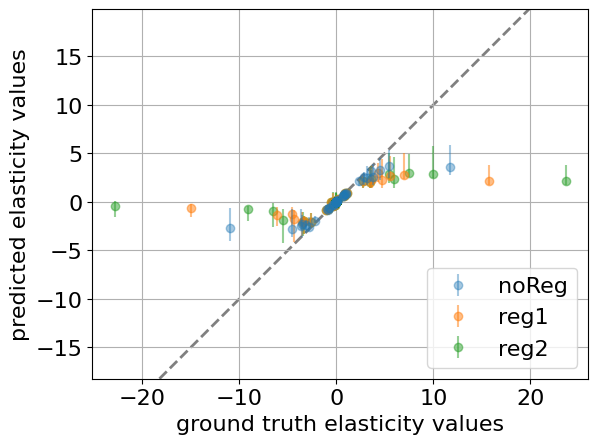

In [22]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gt_noReg, ela_noReg_df['median'], yerr=errors_noReg, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_reg1, ela_reg1_df['median'], yerr=errors_reg1, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_reg2, ela_reg2_df['median'], yerr=errors_reg2, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="lower right", fontsize=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=16)
plt.ylabel('predicted elasticity values', size=16)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities.svg', format="svg")

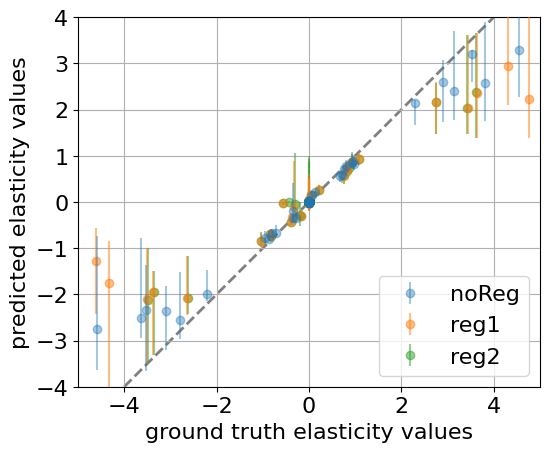

In [23]:
#plt.figure(figsize=(8, 6))
plt.axes().set_aspect('equal')
plt.xlim((-5,5))
plt.ylim((-4,4))

plt.errorbar(gt_noReg, ela_noReg_df['median'], yerr=errors_noReg, alpha=0.4, fmt='o', label='noReg', zorder=100)
plt.errorbar(gt_reg1, ela_reg1_df['median'], yerr=errors_reg1, alpha=0.5, fmt='o', label='reg1', zorder=50)
plt.errorbar(gt_reg2, ela_reg2_df['median'], yerr=errors_reg2, alpha=0.5, fmt='o', label='reg2', zorder=20)
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc="lower right", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth elasticity values', size=16)
plt.ylabel('predicted elasticity values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedElasticities_zoom.svg', format="svg")

### graphing the elasticity errors

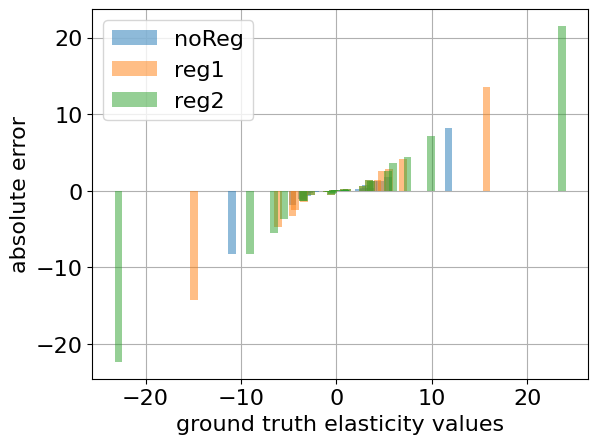

In [24]:
plt.grid()

plt.bar(gt_noReg,gt_noReg-ela_noReg_df['median'], alpha=0.5, label='noReg', zorder=200)
plt.bar(gt_reg1,gt_reg1-ela_reg1_df['median'], alpha=0.5, label='reg1', zorder=200)
plt.bar(gt_reg2,gt_reg2-ela_reg2_df['median'], alpha=0.5, label='reg2', zorder=200)

plt.xlabel('ground truth elasticity values', size=16)
plt.ylabel('absolute error', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.legend(loc="upper left", fontsize=16)

## Calculating control coefficients

In [18]:
Ex01_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_noReg)['prior']['Ex'])
Ex02_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_noReg)['prior']['Ex'])
Ex03_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_noReg)['prior']['Ex'])
Ex04_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_noReg)['prior']['Ex'])
Ex05_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_noReg)['prior']['Ex'])
Ex15_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_noReg)['prior']['Ex'])
Ex3_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_noReg)['prior']['Ex'])
Ex5_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_noReg)['prior']['Ex'])
Ex7_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_noReg)['prior']['Ex'])
Ex100_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_noReg)['prior']['Ex'])

Ex01_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg1)['prior']['Ex'])
Ex02_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg1)['prior']['Ex'])
Ex03_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg1)['prior']['Ex'])
Ex04_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg1)['prior']['Ex'])
Ex05_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg1)['prior']['Ex'])
Ex15_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg1)['prior']['Ex'])
Ex3_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg1)['prior']['Ex'])
Ex5_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg1)['prior']['Ex'])
Ex7_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg1)['prior']['Ex'])
Ex100_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg1)['prior']['Ex'])

Ex01_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg2)['prior']['Ex'])
Ex02_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg2)['prior']['Ex'])
Ex03_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg2)['prior']['Ex'])
Ex04_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg2)['prior']['Ex'])
Ex05_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg2)['prior']['Ex'])
Ex15_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg2)['prior']['Ex'])
Ex3_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg2)['prior']['Ex'])
Ex5_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg2)['prior']['Ex'])
Ex7_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg2)['prior']['Ex'])
Ex100_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg2)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

## Calculating CCC values and making graphs

In [19]:
gtCCC_noReg = pd.DataFrame(rr_noReg.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())
gtCCC_reg1 = pd.DataFrame(rr_reg1.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())
gtCCC_reg2 = pd.DataFrame(rr_reg2.getScaledConcentrationControlCoefficientMatrix(), index=rr_noReg.getFloatingSpeciesIds(), columns=rr_noReg.getReactionIds())

### priors

In [20]:
priorCCC01_noReg = util.estimate_CCCs(BMCA_obj01_noReg, Ex01_prior_noReg.reshape((19,-1)))
priorCCC02_noReg = util.estimate_CCCs(BMCA_obj02_noReg, Ex02_prior_noReg.reshape((19,-1)))
priorCCC03_noReg = util.estimate_CCCs(BMCA_obj03_noReg, Ex03_prior_noReg.reshape((19,-1)))
priorCCC04_noReg = util.estimate_CCCs(BMCA_obj04_noReg, Ex04_prior_noReg.reshape((19,-1)))
priorCCC05_noReg = util.estimate_CCCs(BMCA_obj05_noReg, Ex05_prior_noReg.reshape((19,-1)))
priorCCC15_noReg = util.estimate_CCCs(BMCA_obj15_noReg, Ex15_prior_noReg.reshape((19,-1)))
priorCCC3_noReg = util.estimate_CCCs(BMCA_obj3_noReg, Ex3_prior_noReg.reshape((19,-1)))
priorCCC5_noReg = util.estimate_CCCs(BMCA_obj5_noReg, Ex5_prior_noReg.reshape((19,-1)))
priorCCC7_noReg = util.estimate_CCCs(BMCA_obj7_noReg, Ex7_prior_noReg.reshape((19,-1)))
priorCCC100_noReg = util.estimate_CCCs(BMCA_obj100_noReg, Ex100_prior_noReg.reshape((19,-1)))

priorCCC01_reg1 = util.estimate_CCCs(BMCA_obj01_reg1, Ex01_prior_reg1.reshape((19,-1)))
priorCCC02_reg1 = util.estimate_CCCs(BMCA_obj02_reg1, Ex02_prior_reg1.reshape((19,-1)))
priorCCC03_reg1 = util.estimate_CCCs(BMCA_obj03_reg1, Ex03_prior_reg1.reshape((19,-1)))
priorCCC04_reg1 = util.estimate_CCCs(BMCA_obj04_reg1, Ex04_prior_reg1.reshape((19,-1)))
priorCCC05_reg1 = util.estimate_CCCs(BMCA_obj05_reg1, Ex05_prior_reg1.reshape((19,-1)))
priorCCC15_reg1 = util.estimate_CCCs(BMCA_obj15_reg1, Ex15_prior_reg1.reshape((19,-1)))
priorCCC3_reg1 = util.estimate_CCCs(BMCA_obj3_reg1, Ex3_prior_reg1.reshape((19,-1)))
priorCCC5_reg1 = util.estimate_CCCs(BMCA_obj5_reg1, Ex5_prior_reg1.reshape((19,-1)))
priorCCC7_reg1 = util.estimate_CCCs(BMCA_obj7_reg1, Ex7_prior_reg1.reshape((19,-1)))
priorCCC100_reg1 = util.estimate_CCCs(BMCA_obj100_reg1, Ex100_prior_reg1.reshape((19,-1)))

priorCCC01_reg2 = util.estimate_CCCs(BMCA_obj01_reg2, Ex01_prior_reg2.reshape((19,-1)))
priorCCC02_reg2 = util.estimate_CCCs(BMCA_obj02_reg2, Ex02_prior_reg2.reshape((19,-1)))
priorCCC03_reg2 = util.estimate_CCCs(BMCA_obj03_reg2, Ex03_prior_reg2.reshape((19,-1)))
priorCCC04_reg2 = util.estimate_CCCs(BMCA_obj04_reg2, Ex04_prior_reg2.reshape((19,-1)))
priorCCC05_reg2 = util.estimate_CCCs(BMCA_obj05_reg2, Ex05_prior_reg2.reshape((19,-1)))
priorCCC15_reg2 = util.estimate_CCCs(BMCA_obj15_reg2, Ex15_prior_reg2.reshape((19,-1)))
priorCCC3_reg2 = util.estimate_CCCs(BMCA_obj3_reg2, Ex3_prior_reg2.reshape((19,-1)))
priorCCC5_reg2 = util.estimate_CCCs(BMCA_obj5_reg2, Ex5_prior_reg2.reshape((19,-1)))
priorCCC7_reg2 = util.estimate_CCCs(BMCA_obj7_reg2, Ex7_prior_reg2.reshape((19,-1)))
priorCCC100_reg2 = util.estimate_CCCs(BMCA_obj100_reg2, Ex100_prior_reg2.reshape((19,-1)))


In [21]:
priorCCCs_noReg = [priorCCC01_noReg, priorCCC02_noReg, priorCCC03_noReg, priorCCC04_noReg, priorCCC05_noReg, priorCCC15_noReg, priorCCC3_noReg, priorCCC5_noReg, priorCCC7_noReg, priorCCC100_noReg]
priorCCCs_reg1 = [priorCCC01_reg1, priorCCC02_reg1, priorCCC03_reg1, priorCCC04_reg1, priorCCC05_reg1, priorCCC15_reg1, priorCCC3_reg1, priorCCC5_reg1, priorCCC7_reg1, priorCCC100_reg1]
priorCCCs_reg2 = [priorCCC01_reg2, priorCCC02_reg2, priorCCC03_reg2, priorCCC04_reg2, priorCCC05_reg2, priorCCC15_reg2, priorCCC3_reg2, priorCCC5_reg2, priorCCC7_reg2, priorCCC100_reg2]

In [22]:
priorCCC_noReg_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getFloatingSpeciesIds()) for priorCCC in priorCCCs_noReg]
priorCCC_noReg_meds = pd.concat([i.melt()['value'] for i in priorCCC_noReg_meds], axis=1).values
priorCCC_noReg_meds = pd.DataFrame(priorCCC_noReg_meds, columns=pt_labels)
priorCCC_noReg_meds['median'] = priorCCC_noReg_meds.median(axis=1)
priorCCC_noReg_meds['min'] = priorCCC_noReg_meds.min(axis=1)
priorCCC_noReg_meds['max'] = priorCCC_noReg_meds.max(axis=1)
# priorCCC_noReg_meds

In [23]:
priorCCC_reg1_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getFloatingSpeciesIds()) for priorCCC in priorCCCs_reg1]
priorCCC_reg1_meds = pd.concat([i.melt()['value'] for i in priorCCC_reg1_meds], axis=1).values
priorCCC_reg1_meds = pd.DataFrame(priorCCC_reg1_meds, columns=pt_labels)
priorCCC_reg1_meds['median'] = priorCCC_reg1_meds.median(axis=1)
priorCCC_reg1_meds['min'] = priorCCC_reg1_meds.min(axis=1)
priorCCC_reg1_meds['max'] = priorCCC_reg1_meds.max(axis=1)
# priorCCC_reg1_meds

In [24]:
priorCCC_reg2_meds = [-pd.DataFrame(np.median(priorCCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getFloatingSpeciesIds()) for priorCCC in priorCCCs_reg2]
priorCCC_reg2_meds = pd.concat([i.melt()['value'] for i in priorCCC_reg2_meds], axis=1).values
priorCCC_reg2_meds = pd.DataFrame(priorCCC_reg2_meds, columns=pt_labels)
priorCCC_reg2_meds['median'] = priorCCC_reg2_meds.median(axis=1)
priorCCC_reg2_meds['min'] = priorCCC_reg2_meds.min(axis=1)
priorCCC_reg2_meds['max'] = priorCCC_reg2_meds.max(axis=1)
# priorCCC_reg2_meds

In [25]:
CCC_lower_y_noReg_prior = np.array(priorCCC_noReg_meds['median']) - np.array(priorCCC_noReg_meds['min'])
CCC_upper_y_noReg_prior = np.array(priorCCC_noReg_meds['max']) - np.array(priorCCC_noReg_meds['median'])
CCC_errors_noReg_prior = [CCC_lower_y_noReg_prior, CCC_upper_y_noReg_prior]

CCC_lower_y_reg1_prior = np.array(priorCCC_reg1_meds['median']) - np.array(priorCCC_reg1_meds['min'])
CCC_upper_y_reg1_prior = np.array(priorCCC_reg1_meds['max']) - np.array(priorCCC_reg1_meds['median'])
CCC_errors_reg1_prior = [CCC_lower_y_reg1_prior, CCC_upper_y_reg1_prior]

CCC_lower_y_reg2_prior = np.array(priorCCC_reg2_meds['median']) - np.array(priorCCC_reg2_meds['min'])
CCC_upper_y_reg2_prior = np.array(priorCCC_reg2_meds['max']) - np.array(priorCCC_reg2_meds['median'])
CCC_errors_reg2_prior = [CCC_lower_y_reg2_prior, CCC_upper_y_reg2_prior]

### posteriors

In [26]:
# all data
postCCC01_noReg = util.estimate_CCCs(BMCA_obj01_noReg, Ex01_noReg.reshape((19,-1)))
postCCC02_noReg = util.estimate_CCCs(BMCA_obj02_noReg, Ex02_noReg.reshape((19,-1)))
postCCC03_noReg = util.estimate_CCCs(BMCA_obj03_noReg, Ex03_noReg.reshape((19,-1)))
postCCC04_noReg = util.estimate_CCCs(BMCA_obj04_noReg, Ex04_noReg.reshape((19,-1)))
postCCC05_noReg = util.estimate_CCCs(BMCA_obj05_noReg, Ex05_noReg.reshape((19,-1)))
postCCC15_noReg = util.estimate_CCCs(BMCA_obj15_noReg, Ex15_noReg.reshape((19,-1)))
postCCC3_noReg = util.estimate_CCCs(BMCA_obj3_noReg, Ex3_noReg.reshape((19,-1)))
postCCC5_noReg = util.estimate_CCCs(BMCA_obj5_noReg, Ex5_noReg.reshape((19,-1)))
postCCC7_noReg = util.estimate_CCCs(BMCA_obj7_noReg, Ex7_noReg.reshape((19,-1)))
postCCC100_noReg = util.estimate_CCCs(BMCA_obj100_noReg, Ex100_noReg.reshape((19,-1)))

postCCC01_reg1 = util.estimate_CCCs(BMCA_obj01_reg1, Ex01_reg1.reshape((19,-1)))
postCCC02_reg1 = util.estimate_CCCs(BMCA_obj02_reg1, Ex02_reg1.reshape((19,-1)))
postCCC03_reg1 = util.estimate_CCCs(BMCA_obj03_reg1, Ex03_reg1.reshape((19,-1)))
postCCC04_reg1 = util.estimate_CCCs(BMCA_obj04_reg1, Ex04_reg1.reshape((19,-1)))
postCCC05_reg1 = util.estimate_CCCs(BMCA_obj05_reg1, Ex05_reg1.reshape((19,-1)))
postCCC15_reg1 = util.estimate_CCCs(BMCA_obj15_reg1, Ex15_reg1.reshape((19,-1)))
postCCC3_reg1 = util.estimate_CCCs(BMCA_obj3_reg1, Ex3_reg1.reshape((19,-1)))
postCCC5_reg1 = util.estimate_CCCs(BMCA_obj5_reg1, Ex5_reg1.reshape((19,-1)))
postCCC7_reg1 = util.estimate_CCCs(BMCA_obj7_reg1, Ex7_reg1.reshape((19,-1)))
postCCC100_reg1 = util.estimate_CCCs(BMCA_obj100_reg1, Ex100_reg1.reshape((19,-1)))

postCCC01_reg2 = util.estimate_CCCs(BMCA_obj01_reg2, Ex01_reg2.reshape((19,-1)))
postCCC02_reg2 = util.estimate_CCCs(BMCA_obj02_reg2, Ex02_reg2.reshape((19,-1)))
postCCC03_reg2 = util.estimate_CCCs(BMCA_obj03_reg2, Ex03_reg2.reshape((19,-1)))
postCCC04_reg2 = util.estimate_CCCs(BMCA_obj04_reg2, Ex04_reg2.reshape((19,-1)))
postCCC05_reg2 = util.estimate_CCCs(BMCA_obj05_reg2, Ex05_reg2.reshape((19,-1)))
postCCC15_reg2 = util.estimate_CCCs(BMCA_obj15_reg2, Ex15_reg2.reshape((19,-1)))
postCCC3_reg2 = util.estimate_CCCs(BMCA_obj3_reg2, Ex3_reg2.reshape((19,-1)))
postCCC5_reg2 = util.estimate_CCCs(BMCA_obj5_reg2, Ex5_reg2.reshape((19,-1)))
postCCC7_reg2 = util.estimate_CCCs(BMCA_obj7_reg2, Ex7_reg2.reshape((19,-1)))
postCCC100_reg2 = util.estimate_CCCs(BMCA_obj100_reg2, Ex100_reg2.reshape((19,-1)))

In [27]:
postCCCs_noReg = [postCCC01_noReg, postCCC02_noReg, postCCC03_noReg, postCCC04_noReg, postCCC05_noReg, postCCC15_noReg, postCCC3_noReg, postCCC5_noReg, postCCC7_noReg, postCCC100_noReg]
postCCCs_reg1 = [postCCC01_reg1, postCCC02_reg1, postCCC03_reg1, postCCC04_reg1, postCCC05_reg1, postCCC15_reg1, postCCC3_reg1, postCCC5_reg1, postCCC7_reg1, postCCC100_reg1]
postCCCs_reg2 = [postCCC01_reg2, postCCC02_reg2, postCCC03_reg2, postCCC04_reg2, postCCC05_reg2, postCCC15_reg2, postCCC3_reg2, postCCC5_reg2, postCCC7_reg2, postCCC100_reg2]

In [28]:
postCCC_noReg_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getFloatingSpeciesIds()) for postCCC in postCCCs_noReg]
postCCC_noReg_meds = pd.concat([i.melt()['value'] for i in postCCC_noReg_meds], axis=1).values
postCCC_noReg_meds = pd.DataFrame(postCCC_noReg_meds, columns=pt_labels)
postCCC_noReg_meds['median'] = postCCC_noReg_meds.median(axis=1)
postCCC_noReg_meds['min'] = postCCC_noReg_meds.min(axis=1)
postCCC_noReg_meds['max'] = postCCC_noReg_meds.max(axis=1)
# postCCC_noReg_meds

In [29]:
postCCC_reg1_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getFloatingSpeciesIds()) for postCCC in postCCCs_reg1]
postCCC_reg1_meds = pd.concat([i.melt()['value'] for i in postCCC_reg1_meds], axis=1).values
postCCC_reg1_meds = pd.DataFrame(postCCC_reg1_meds, columns=pt_labels)
postCCC_reg1_meds['median'] = postCCC_reg1_meds.median(axis=1)
postCCC_reg1_meds['min'] = postCCC_reg1_meds.min(axis=1)
postCCC_reg1_meds['max'] = postCCC_reg1_meds.max(axis=1)
# postCCC_reg1_meds

In [30]:
postCCC_reg2_meds = [-pd.DataFrame(np.median(postCCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getFloatingSpeciesIds()) for postCCC in postCCCs_reg2]
postCCC_reg2_meds = pd.concat([i.melt()['value'] for i in postCCC_reg2_meds], axis=1).values
postCCC_reg2_meds = pd.DataFrame(postCCC_reg2_meds, columns=pt_labels)
postCCC_reg2_meds['median'] = postCCC_reg2_meds.median(axis=1)
postCCC_reg2_meds['min'] = postCCC_reg2_meds.min(axis=1)
postCCC_reg2_meds['max'] = postCCC_reg2_meds.max(axis=1)
# postCCC_reg2_meds

In [31]:
CCC_lower_y_noReg_post = np.array(postCCC_noReg_meds['median']) - np.array(postCCC_noReg_meds['min'])
CCC_upper_y_noReg_post = np.array(postCCC_noReg_meds['max']) - np.array(postCCC_noReg_meds['median'])
CCC_errors_noReg_post = [CCC_lower_y_noReg_post, CCC_upper_y_noReg_post]

CCC_lower_y_reg1_post = np.array(postCCC_reg1_meds['median']) - np.array(postCCC_reg1_meds['min'])
CCC_upper_y_reg1_post = np.array(postCCC_reg1_meds['max']) - np.array(postCCC_reg1_meds['median'])
CCC_errors_reg1_post = [CCC_lower_y_reg1_post, CCC_upper_y_reg1_post]

CCC_lower_y_reg2_post = np.array(postCCC_reg2_meds['median']) - np.array(postCCC_reg2_meds['min'])
CCC_upper_y_reg2_post = np.array(postCCC_reg2_meds['max']) - np.array(postCCC_reg2_meds['median'])
CCC_errors_reg2_post = [CCC_lower_y_reg2_post, CCC_upper_y_reg2_post]

### graphs

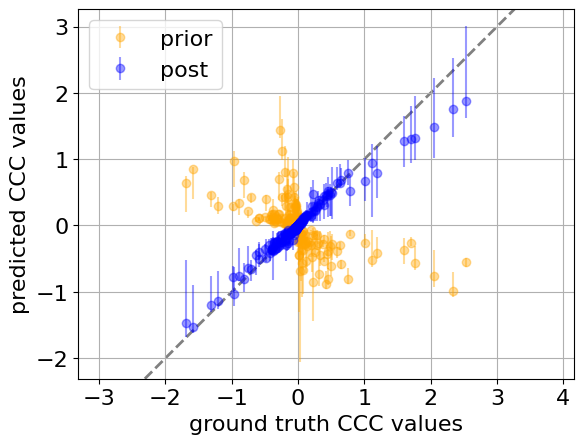

In [40]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'], yerr=CCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], yerr=CCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=16)
plt.ylabel('predicted CCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_noReg.svg', format="svg")

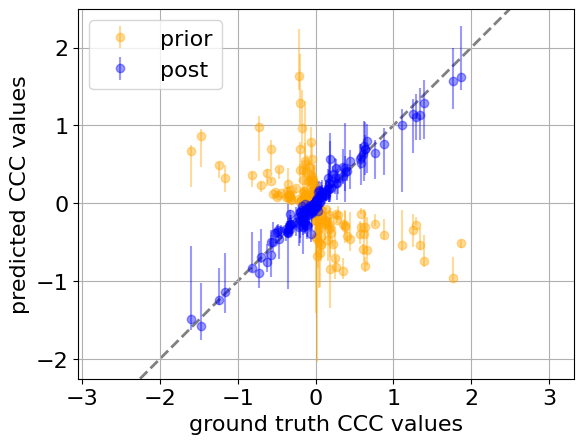

In [41]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'], yerr=CCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], yerr=CCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=16)
plt.ylabel('predicted CCC values', size=16)

_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg1.svg', format="svg")

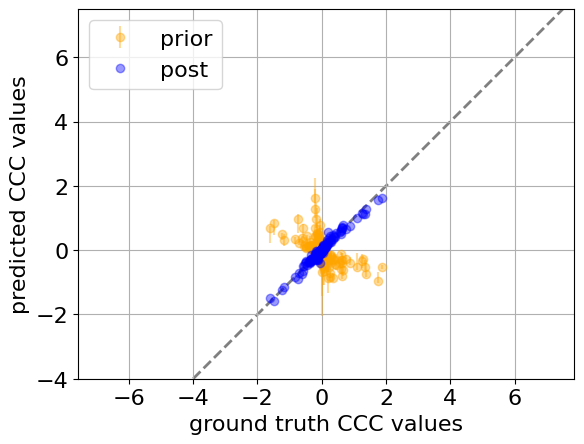

In [42]:
plt.axes().set_aspect('equal', 'datalim')

plt.ylim(-4, 7.5)

plt.errorbar(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'], yerr=CCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], alpha=0.4, fmt='o', label='post', zorder=100, c='b') # yerr=CCC_errors_reg1_post

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=16)
plt.ylabel('predicted CCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg1_zoom.svg', format="svg")

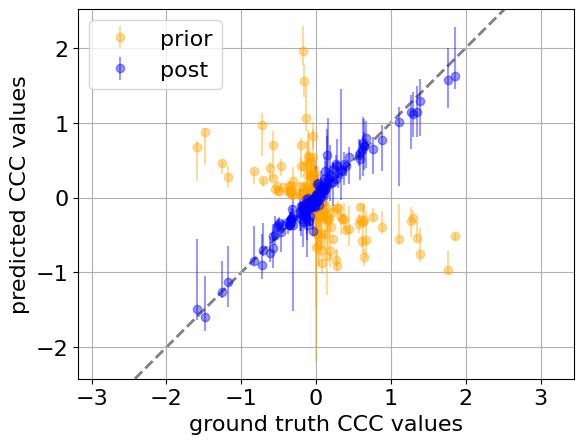

In [43]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'], yerr=CCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], yerr=CCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=16)
plt.ylabel('predicted CCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg2.svg', format="svg")

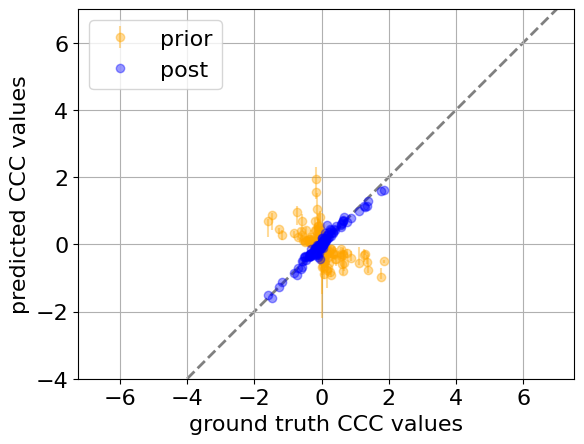

In [44]:
plt.axes().set_aspect('equal', 'datalim')

plt.ylim((-4,7))

plt.errorbar(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'], yerr=CCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], alpha=0.4, fmt='o', label='post', zorder=100, c='b') # yerr=CCC_errors_reg2_post,

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth CCC values', size=16)
plt.ylabel('predicted CCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianCCCs_reg2_zoom.svg', format="svg")

### combined graph of CCC values

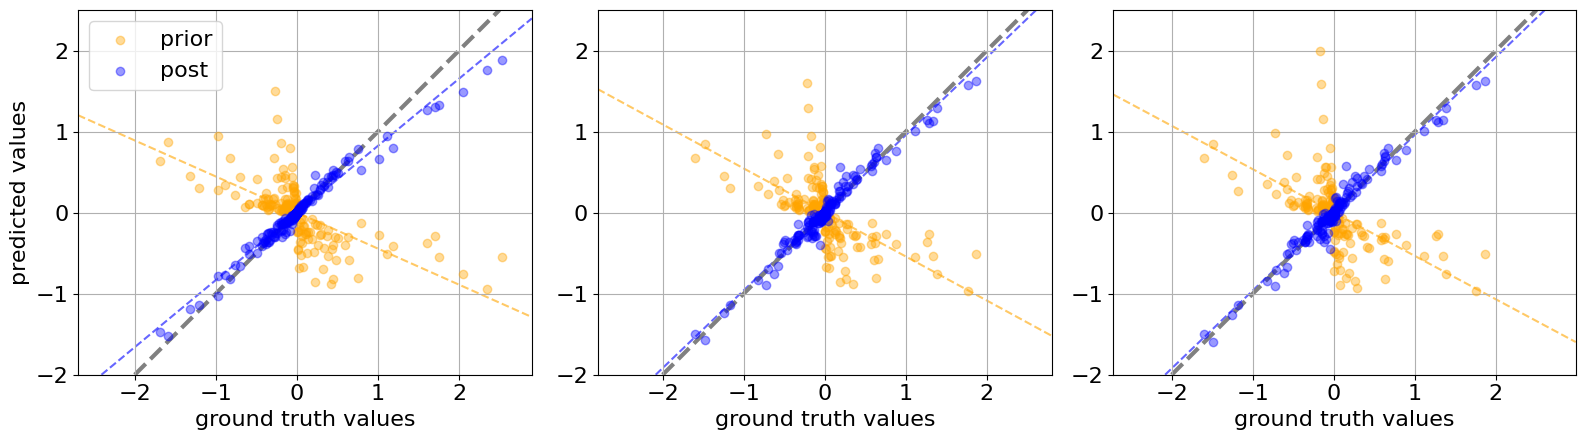

In [40]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))

for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_aspect('equal')
ax[0].scatter(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], priorCCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].set_xlim((-2.7,2.9))
ax[0].set_ylim((-2,2.5))
ax[0].grid()
ax[0].legend(loc="upper left", fontsize=16)
ax[0].set_xlabel('ground truth values', fontsize=16)

ax[1].set_aspect('equal')
ax[1].scatter(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], priorCCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].set_xlim((-2.8,2.8))
ax[1].set_ylim((-2,2.5))
ax[1].grid()
ax[1].set_xlabel('ground truth values', fontsize=16)

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], priorCCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
#ax[2].set_ylim((-4,8))
ax[2].set_ylim((-2,2.5))
ax[2].grid()

ax[2].set_xlabel('ground truth values', fontsize=16)
ax[0].set_ylabel('predicted values', fontsize=16)
  
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

f.tight_layout()

plt.savefig(f'../visualize/raw_svg_figures/top{topology}/CCCs/top{topology}-{omission}-combinedCCCs.svg', format="svg")

In [39]:
os.getcwd()

'c:\\Users\\user\\Documents\\research\\BMCA-pipeline\\notebooks'

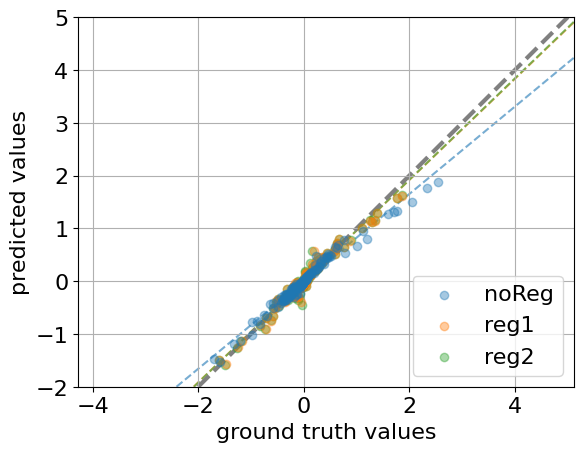

In [46]:
# Create two subplots and unpack the output array immediately

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], alpha=0.4, label='noReg', zorder=300)
plt.scatter(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], alpha=0.4,  label='reg1', zorder=200)
plt.scatter(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], alpha=0.4,  label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values', fontsize=16)
plt.ylabel('predicted values', fontsize=16)

plt.ylim((-2, 5))

_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

f.tight_layout()

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedCCCs_byAllostery.svg', format="svg")

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, -3.0, '−3'),
  Text(0, -2.0, '−2'),
  Text(0, -1.0, '−1'),
  Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4')])

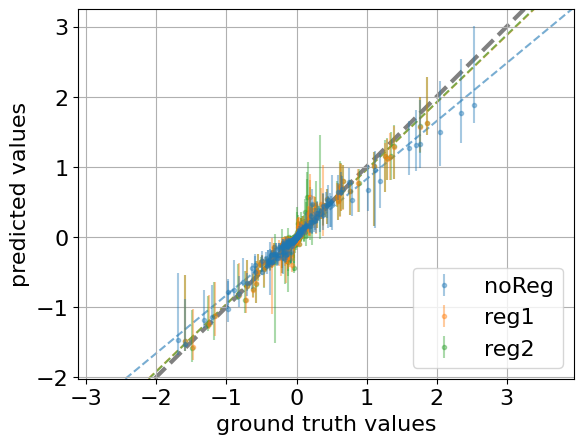

In [47]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'], yerr=CCC_errors_noReg_post, alpha=0.4, fmt='o', markersize=3, label='noReg', zorder=300)
plt.errorbar(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'], yerr=CCC_errors_reg1_post, alpha=0.4, fmt='o', markersize=3, label='reg1', zorder=200)
plt.errorbar(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'], yerr=CCC_errors_reg2_post, alpha=0.4, fmt='o', markersize=3, label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtCCC_noReg.melt()['value'], postCCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg1.melt()['value'], postCCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtCCC_reg2.melt()['value'], postCCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values', fontsize=16)
plt.ylabel('predicted values', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedCCCs_byAllostery_wError.svg', format="svg")

## Calculating FCC values and making graphs

In [48]:
gtFCC_noReg = pd.DataFrame(rr_noReg.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg1 = pd.DataFrame(rr_reg1.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())
gtFCC_reg2 = pd.DataFrame(rr_reg2.getScaledFluxControlCoefficientMatrix(), index=rr_noReg.getReactionIds(), columns=rr_noReg.getReactionIds())

### priors

In [49]:
Ex01_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_noReg)['prior']['Ex'])
Ex02_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_noReg)['prior']['Ex'])
Ex03_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_noReg)['prior']['Ex'])
Ex04_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_noReg)['prior']['Ex'])
Ex05_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_noReg)['prior']['Ex'])
Ex15_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_noReg)['prior']['Ex'])
Ex3_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_noReg)['prior']['Ex'])
Ex5_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_noReg)['prior']['Ex'])
Ex7_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_noReg)['prior']['Ex'])
Ex100_prior_noReg= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_noReg)['prior']['Ex'])

Ex01_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg1)['prior']['Ex'])
Ex02_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg1)['prior']['Ex'])
Ex03_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg1)['prior']['Ex'])
Ex04_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg1)['prior']['Ex'])
Ex05_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg1)['prior']['Ex'])
Ex15_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg1)['prior']['Ex'])
Ex3_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg1)['prior']['Ex'])
Ex5_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg1)['prior']['Ex'])
Ex7_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg1)['prior']['Ex'])
Ex100_prior_reg1= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg1)['prior']['Ex'])

Ex01_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj01_reg2)['prior']['Ex'])
Ex02_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj02_reg2)['prior']['Ex'])
Ex03_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj03_reg2)['prior']['Ex'])
Ex04_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj04_reg2)['prior']['Ex'])
Ex05_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj05_reg2)['prior']['Ex'])
Ex15_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj15_reg2)['prior']['Ex'])
Ex3_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj3_reg2)['prior']['Ex'])
Ex5_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj5_reg2)['prior']['Ex'])
Ex7_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj7_reg2)['prior']['Ex'])
Ex100_prior_reg2= util.get_az_summary(util.run_prior_predictive(BMCA_obj100_reg2)['prior']['Ex'])


Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries, Ex_kinetic_entries, Ey_capacity_entries, Ey_kinetic_entries]
arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)
Sampling: [Ex_capacity_entries

In [50]:
priorFCC01_noReg = util.estimate_FCCs(BMCA_obj01_noReg, Ex01_prior_noReg.reshape((19,13)))
priorFCC02_noReg = util.estimate_FCCs(BMCA_obj02_noReg, Ex02_prior_noReg.reshape((19,13)))
priorFCC03_noReg = util.estimate_FCCs(BMCA_obj03_noReg, Ex03_prior_noReg.reshape((19,13)))
priorFCC04_noReg = util.estimate_FCCs(BMCA_obj04_noReg, Ex04_prior_noReg.reshape((19,13)))
priorFCC05_noReg = util.estimate_FCCs(BMCA_obj05_noReg, Ex05_prior_noReg.reshape((19,13)))
priorFCC15_noReg = util.estimate_FCCs(BMCA_obj15_noReg, Ex15_prior_noReg.reshape((19,13)))
priorFCC3_noReg = util.estimate_FCCs(BMCA_obj3_noReg, Ex3_prior_noReg.reshape((19,13)))
priorFCC5_noReg = util.estimate_FCCs(BMCA_obj5_noReg, Ex5_prior_noReg.reshape((19,13)))
priorFCC7_noReg = util.estimate_FCCs(BMCA_obj7_noReg, Ex7_prior_noReg.reshape((19,13)))
priorFCC100_noReg = util.estimate_FCCs(BMCA_obj100_noReg, Ex100_prior_noReg.reshape((19,13)))

priorFCC01_reg1 = util.estimate_FCCs(BMCA_obj01_reg1, Ex01_prior_reg1.reshape((19,13)))
priorFCC02_reg1 = util.estimate_FCCs(BMCA_obj02_reg1, Ex02_prior_reg1.reshape((19,13)))
priorFCC03_reg1 = util.estimate_FCCs(BMCA_obj03_reg1, Ex03_prior_reg1.reshape((19,13)))
priorFCC04_reg1 = util.estimate_FCCs(BMCA_obj04_reg1, Ex04_prior_reg1.reshape((19,13)))
priorFCC05_reg1 = util.estimate_FCCs(BMCA_obj05_reg1, Ex05_prior_reg1.reshape((19,13)))
priorFCC15_reg1 = util.estimate_FCCs(BMCA_obj15_reg1, Ex15_prior_reg1.reshape((19,13)))
priorFCC3_reg1 = util.estimate_FCCs(BMCA_obj3_reg1, Ex3_prior_reg1.reshape((19,13)))
priorFCC5_reg1 = util.estimate_FCCs(BMCA_obj5_reg1, Ex5_prior_reg1.reshape((19,13)))
priorFCC7_reg1 = util.estimate_FCCs(BMCA_obj7_reg1, Ex7_prior_reg1.reshape((19,13)))
priorFCC100_reg1 = util.estimate_FCCs(BMCA_obj100_reg1, Ex100_prior_reg1.reshape((19,13)))

priorFCC01_reg2 = util.estimate_FCCs(BMCA_obj01_reg2, Ex01_prior_reg2.reshape((19,13)))
priorFCC02_reg2 = util.estimate_FCCs(BMCA_obj02_reg2, Ex02_prior_reg2.reshape((19,13)))
priorFCC03_reg2 = util.estimate_FCCs(BMCA_obj03_reg2, Ex03_prior_reg2.reshape((19,13)))
priorFCC04_reg2 = util.estimate_FCCs(BMCA_obj04_reg2, Ex04_prior_reg2.reshape((19,13)))
priorFCC05_reg2 = util.estimate_FCCs(BMCA_obj05_reg2, Ex05_prior_reg2.reshape((19,13)))
priorFCC15_reg2 = util.estimate_FCCs(BMCA_obj15_reg2, Ex15_prior_reg2.reshape((19,13)))
priorFCC3_reg2 = util.estimate_FCCs(BMCA_obj3_reg2, Ex3_prior_reg2.reshape((19,13)))
priorFCC5_reg2 = util.estimate_FCCs(BMCA_obj5_reg2, Ex5_prior_reg2.reshape((19,13)))
priorFCC7_reg2 = util.estimate_FCCs(BMCA_obj7_reg2, Ex7_prior_reg2.reshape((19,13)))
priorFCC100_reg2 = util.estimate_FCCs(BMCA_obj100_reg2, Ex100_prior_reg2.reshape((19,13)))


In [51]:
priorFCCs_noReg = [priorFCC01_noReg, priorFCC02_noReg, priorFCC03_noReg, priorFCC04_noReg, priorFCC05_noReg, priorFCC15_noReg, priorFCC3_noReg, priorFCC5_noReg, priorFCC7_noReg, priorFCC100_noReg]
priorFCCs_reg1 = [priorFCC01_reg1, priorFCC02_reg1, priorFCC03_reg1, priorFCC04_reg1, priorFCC05_reg1, priorFCC15_reg1, priorFCC3_reg1, priorFCC5_reg1, priorFCC7_reg1, priorFCC100_reg1]
priorFCCs_reg2 = [priorFCC01_reg2, priorFCC02_reg2, priorFCC03_reg2, priorFCC04_reg2, priorFCC05_reg2, priorFCC15_reg2, priorFCC3_reg2, priorFCC5_reg2, priorFCC7_reg2, priorFCC100_reg2]

In [52]:
priorFCC_noReg_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for priorFCC in priorFCCs_noReg]
priorFCC_noReg_meds = pd.concat([i.melt()['value'] for i in priorFCC_noReg_meds], axis=1).values
priorFCC_noReg_meds = pd.DataFrame(priorFCC_noReg_meds, columns=pt_labels)
priorFCC_noReg_meds['median'] = priorFCC_noReg_meds.median(axis=1)
priorFCC_noReg_meds['min'] = priorFCC_noReg_meds.min(axis=1)
priorFCC_noReg_meds['max'] = priorFCC_noReg_meds.max(axis=1)
# priorFCC_noReg_meds

In [53]:
priorFCC_reg1_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for priorFCC in priorFCCs_reg1]
priorFCC_reg1_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg1_meds], axis=1).values
priorFCC_reg1_meds = pd.DataFrame(priorFCC_reg1_meds, columns=pt_labels)
priorFCC_reg1_meds['median'] = priorFCC_reg1_meds.median(axis=1)
priorFCC_reg1_meds['min'] = priorFCC_reg1_meds.min(axis=1)
priorFCC_reg1_meds['max'] = priorFCC_reg1_meds.max(axis=1)
# priorFCC_reg1_meds

In [54]:
priorFCC_reg2_meds = [-pd.DataFrame(np.median(priorFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for priorFCC in priorFCCs_reg2]
priorFCC_reg2_meds = pd.concat([i.melt()['value'] for i in priorFCC_reg2_meds], axis=1).values
priorFCC_reg2_meds = pd.DataFrame(priorFCC_reg2_meds, columns=pt_labels)
priorFCC_reg2_meds['median'] = priorFCC_reg2_meds.median(axis=1)
priorFCC_reg2_meds['min'] = priorFCC_reg2_meds.min(axis=1)
priorFCC_reg2_meds['max'] = priorFCC_reg2_meds.max(axis=1)
# priorFCC_reg2_meds

In [55]:
FCC_lower_y_noReg_prior = np.array(priorFCC_noReg_meds['median']) - np.array(priorFCC_noReg_meds['min'])
FCC_upper_y_noReg_prior = np.array(priorFCC_noReg_meds['max']) - np.array(priorFCC_noReg_meds['median'])
FCC_errors_noReg_prior = [FCC_lower_y_noReg_prior, FCC_upper_y_noReg_prior]

FCC_lower_y_reg1_prior = np.array(priorFCC_reg1_meds['median']) - np.array(priorFCC_reg1_meds['min'])
FCC_upper_y_reg1_prior = np.array(priorFCC_reg1_meds['max']) - np.array(priorFCC_reg1_meds['median'])
FCC_errors_reg1_prior = [FCC_lower_y_reg1_prior, FCC_upper_y_reg1_prior]

FCC_lower_y_reg2_prior = np.array(priorFCC_reg2_meds['median']) - np.array(priorFCC_reg2_meds['min'])
FCC_upper_y_reg2_prior = np.array(priorFCC_reg2_meds['max']) - np.array(priorFCC_reg2_meds['median'])
FCC_errors_reg2_prior = [FCC_lower_y_reg2_prior, FCC_upper_y_reg2_prior]

### posteriors

In [56]:
# all data
postFCC01_noReg = util.estimate_FCCs(BMCA_obj01_noReg, Ex01_noReg.reshape((19,13)))
postFCC02_noReg = util.estimate_FCCs(BMCA_obj02_noReg, Ex02_noReg.reshape((19,13)))
postFCC03_noReg = util.estimate_FCCs(BMCA_obj03_noReg, Ex03_noReg.reshape((19,13)))
postFCC04_noReg = util.estimate_FCCs(BMCA_obj04_noReg, Ex04_noReg.reshape((19,13)))
postFCC05_noReg = util.estimate_FCCs(BMCA_obj05_noReg, Ex05_noReg.reshape((19,13)))
postFCC15_noReg = util.estimate_FCCs(BMCA_obj15_noReg, Ex15_noReg.reshape((19,13)))
postFCC3_noReg = util.estimate_FCCs(BMCA_obj3_noReg, Ex3_noReg.reshape((19,13)))
postFCC5_noReg = util.estimate_FCCs(BMCA_obj5_noReg, Ex5_noReg.reshape((19,13)))
postFCC7_noReg = util.estimate_FCCs(BMCA_obj7_noReg, Ex7_noReg.reshape((19,13)))
postFCC100_noReg = util.estimate_FCCs(BMCA_obj100_noReg, Ex100_noReg.reshape((19,13)))

postFCC01_reg1 = util.estimate_FCCs(BMCA_obj01_reg1, Ex01_reg1.reshape((19,13)))
postFCC02_reg1 = util.estimate_FCCs(BMCA_obj02_reg1, Ex02_reg1.reshape((19,13)))
postFCC03_reg1 = util.estimate_FCCs(BMCA_obj03_reg1, Ex03_reg1.reshape((19,13)))
postFCC04_reg1 = util.estimate_FCCs(BMCA_obj04_reg1, Ex04_reg1.reshape((19,13)))
postFCC05_reg1 = util.estimate_FCCs(BMCA_obj05_reg1, Ex05_reg1.reshape((19,13)))
postFCC15_reg1 = util.estimate_FCCs(BMCA_obj15_reg1, Ex15_reg1.reshape((19,13)))
postFCC3_reg1 = util.estimate_FCCs(BMCA_obj3_reg1, Ex3_reg1.reshape((19,13)))
postFCC5_reg1 = util.estimate_FCCs(BMCA_obj5_reg1, Ex5_reg1.reshape((19,13)))
postFCC7_reg1 = util.estimate_FCCs(BMCA_obj7_reg1, Ex7_reg1.reshape((19,13)))
postFCC100_reg1 = util.estimate_FCCs(BMCA_obj100_reg1, Ex100_reg1.reshape((19,13)))

postFCC01_reg2 = util.estimate_FCCs(BMCA_obj01_reg2, Ex01_reg2.reshape((19,13)))
postFCC02_reg2 = util.estimate_FCCs(BMCA_obj02_reg2, Ex02_reg2.reshape((19,13)))
postFCC03_reg2 = util.estimate_FCCs(BMCA_obj03_reg2, Ex03_reg2.reshape((19,13)))
postFCC04_reg2 = util.estimate_FCCs(BMCA_obj04_reg2, Ex04_reg2.reshape((19,13)))
postFCC05_reg2 = util.estimate_FCCs(BMCA_obj05_reg2, Ex05_reg2.reshape((19,13)))
postFCC15_reg2 = util.estimate_FCCs(BMCA_obj15_reg2, Ex15_reg2.reshape((19,13)))
postFCC3_reg2 = util.estimate_FCCs(BMCA_obj3_reg2, Ex3_reg2.reshape((19,13)))
postFCC5_reg2 = util.estimate_FCCs(BMCA_obj5_reg2, Ex5_reg2.reshape((19,13)))
postFCC7_reg2 = util.estimate_FCCs(BMCA_obj7_reg2, Ex7_reg2.reshape((19,13)))
postFCC100_reg2 = util.estimate_FCCs(BMCA_obj100_reg2, Ex100_reg2.reshape((19,13)))

In [57]:
postFCCs_noReg = [postFCC01_noReg, postFCC02_noReg, postFCC03_noReg, postFCC04_noReg, postFCC05_noReg, postFCC15_noReg, postFCC3_noReg, postFCC5_noReg, postFCC7_noReg, postFCC100_noReg]
postFCCs_reg1 = [postFCC01_reg1, postFCC02_reg1, postFCC03_reg1, postFCC04_reg1, postFCC05_reg1, postFCC15_reg1, postFCC3_reg1, postFCC5_reg1, postFCC7_reg1, postFCC100_reg1]
postFCCs_reg2 = [postFCC01_reg2, postFCC02_reg2, postFCC03_reg2, postFCC04_reg2, postFCC05_reg2, postFCC15_reg2, postFCC3_reg2, postFCC5_reg2, postFCC7_reg2, postFCC100_reg2]

In [58]:
postFCC_noReg_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_noReg.getReactionIds(), index=rr_noReg.getReactionIds()) for postFCC in postFCCs_noReg]
postFCC_noReg_meds = pd.concat([i.melt()['value'] for i in postFCC_noReg_meds], axis=1).values
postFCC_noReg_meds = pd.DataFrame(postFCC_noReg_meds, columns=pt_labels)
postFCC_noReg_meds['median'] = postFCC_noReg_meds.median(axis=1)
postFCC_noReg_meds['min'] = postFCC_noReg_meds.min(axis=1)
postFCC_noReg_meds['max'] = postFCC_noReg_meds.max(axis=1)
# postFCC_noReg_meds

In [59]:
postFCC_reg1_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg1.getReactionIds(), index=rr_reg1.getReactionIds()) for postFCC in postFCCs_reg1]
postFCC_reg1_meds = pd.concat([i.melt()['value'] for i in postFCC_reg1_meds], axis=1).values
postFCC_reg1_meds = pd.DataFrame(postFCC_reg1_meds, columns=pt_labels)
postFCC_reg1_meds['median'] = postFCC_reg1_meds.median(axis=1)
postFCC_reg1_meds['min'] = postFCC_reg1_meds.min(axis=1)
postFCC_reg1_meds['max'] = postFCC_reg1_meds.max(axis=1)
# postFCC_reg1_meds

In [60]:
postFCC_reg2_meds = [-pd.DataFrame(np.median(postFCC, axis=0), columns=rr_reg2.getReactionIds(), index=rr_reg2.getReactionIds()) for postFCC in postFCCs_reg2]
postFCC_reg2_meds = pd.concat([i.melt()['value'] for i in postFCC_reg2_meds], axis=1).values
postFCC_reg2_meds = pd.DataFrame(postFCC_reg2_meds, columns=pt_labels)
postFCC_reg2_meds['median'] = postFCC_reg2_meds.median(axis=1)
postFCC_reg2_meds['min'] = postFCC_reg2_meds.min(axis=1)
postFCC_reg2_meds['max'] = postFCC_reg2_meds.max(axis=1)
# postFCC_reg2_meds

In [61]:
FCC_lower_y_noReg_post = np.array(postFCC_noReg_meds['median']) - np.array(postFCC_noReg_meds['min'])
FCC_upper_y_noReg_post = np.array(postFCC_noReg_meds['max']) - np.array(postFCC_noReg_meds['median'])
FCC_errors_noReg_post = [FCC_lower_y_noReg_post, FCC_upper_y_noReg_post]

FCC_lower_y_reg1_post = np.array(postFCC_reg1_meds['median']) - np.array(postFCC_reg1_meds['min'])
FCC_upper_y_reg1_post = np.array(postFCC_reg1_meds['max']) - np.array(postFCC_reg1_meds['median'])
FCC_errors_reg1_post = [FCC_lower_y_reg1_post, FCC_upper_y_reg1_post]

FCC_lower_y_reg2_post = np.array(postFCC_reg2_meds['median']) - np.array(postFCC_reg2_meds['min'])
FCC_upper_y_reg2_post = np.array(postFCC_reg2_meds['max']) - np.array(postFCC_reg2_meds['median'])
FCC_errors_reg2_post = [FCC_lower_y_reg2_post, FCC_upper_y_reg2_post]

### graphs

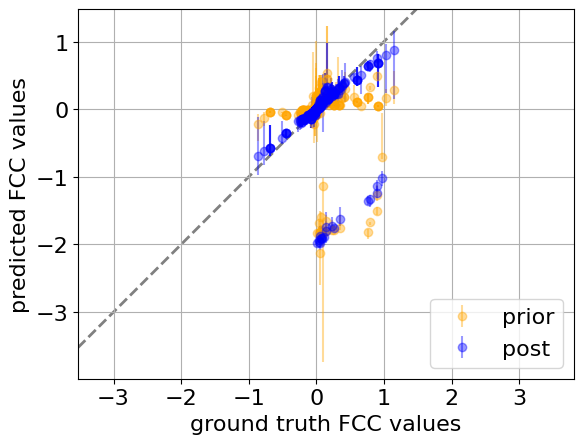

In [69]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="lower right", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg.svg', format="svg")

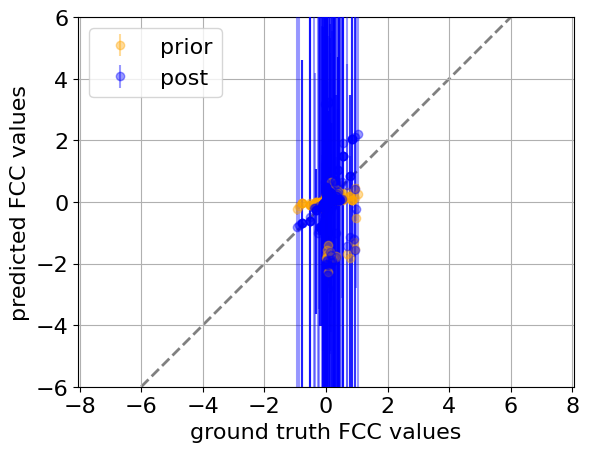

In [70]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], yerr=FCC_errors_reg1_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], yerr=FCC_errors_reg1_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1.svg', format="svg")

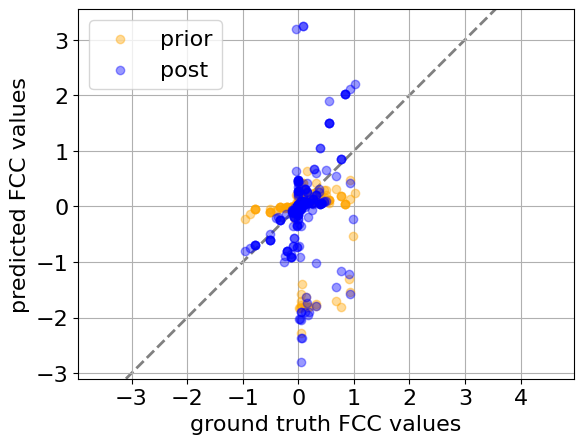

In [71]:
## needs to be rerun

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
plt.xlim((-6,7))
plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)

_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1.svg', format="svg")

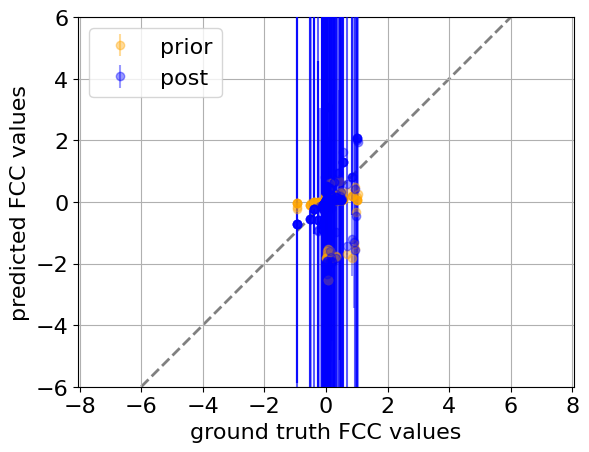

In [72]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], yerr=FCC_errors_reg2_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], yerr=FCC_errors_reg2_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2.svg', format="svg")

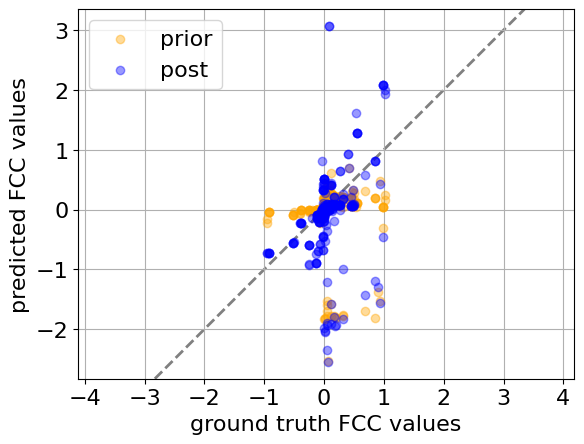

In [73]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4, label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2.svg', format="svg")

### adding corrections for where the enzyme perturbed is directly involved in the reaction

In [62]:
rxn = np.repeat(rr_noReg.getReactionIds(),len(rr_noReg.getReactionIds()))
enz_pt = rr_noReg.getReactionIds() * len(rr_noReg.getReactionIds())
FCC_idx = pd.DataFrame([rxn, enz_pt]).T

In [63]:
pt_enz_is_rxn = np.linspace(0,len(rxn)-1,len(rr_noReg.getReactionIds()))
pt_enz_is_rxn

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360.])

### graphing the corrected FCC dfs

In [64]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

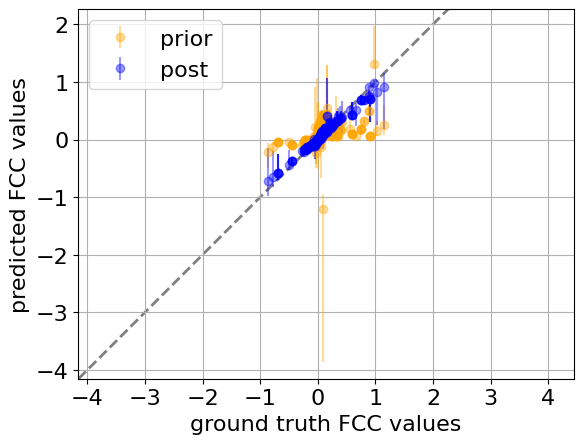

In [65]:
plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], yerr=FCC_errors_noReg_prior, alpha=0.4, fmt='o', label='prior', zorder=100, c='orange')
plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_noReg_wCorrection.svg', format="svg")

Text(0, 0.5, 'predicted FCC values')

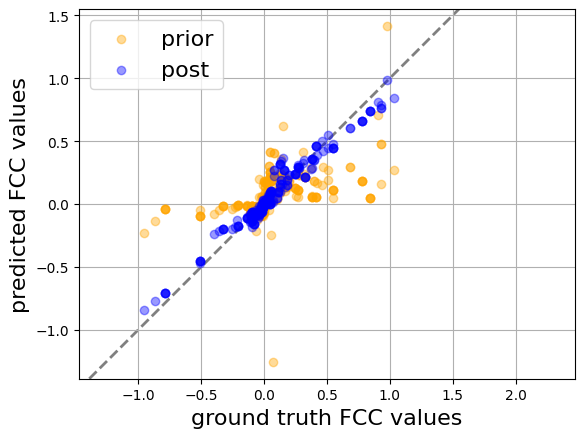

In [66]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
plt.xlim((-6,7))

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg1_wCorrection.svg', format="svg")

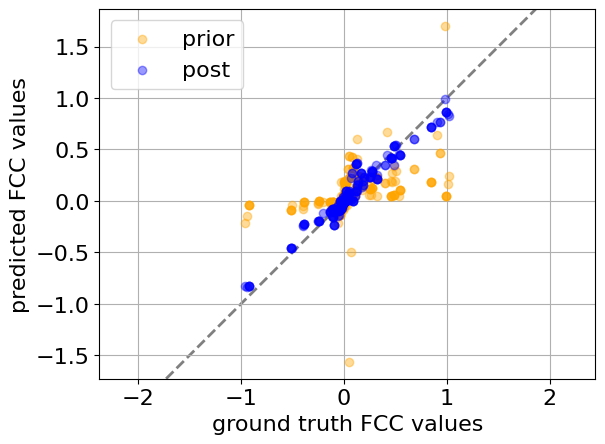

In [67]:
plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4, label='post', zorder=100, c='b')

plt.legend(loc="upper left", fontsize=16)
plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=2)
plt.grid(True, which='both', axis='both', zorder=0)
plt.xlabel('ground truth FCC values', size=16)
plt.ylabel('predicted FCC values', size=16)
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-medianFCCs_reg2_wCorrection.svg', format="svg")

### Combined graph of FCC values

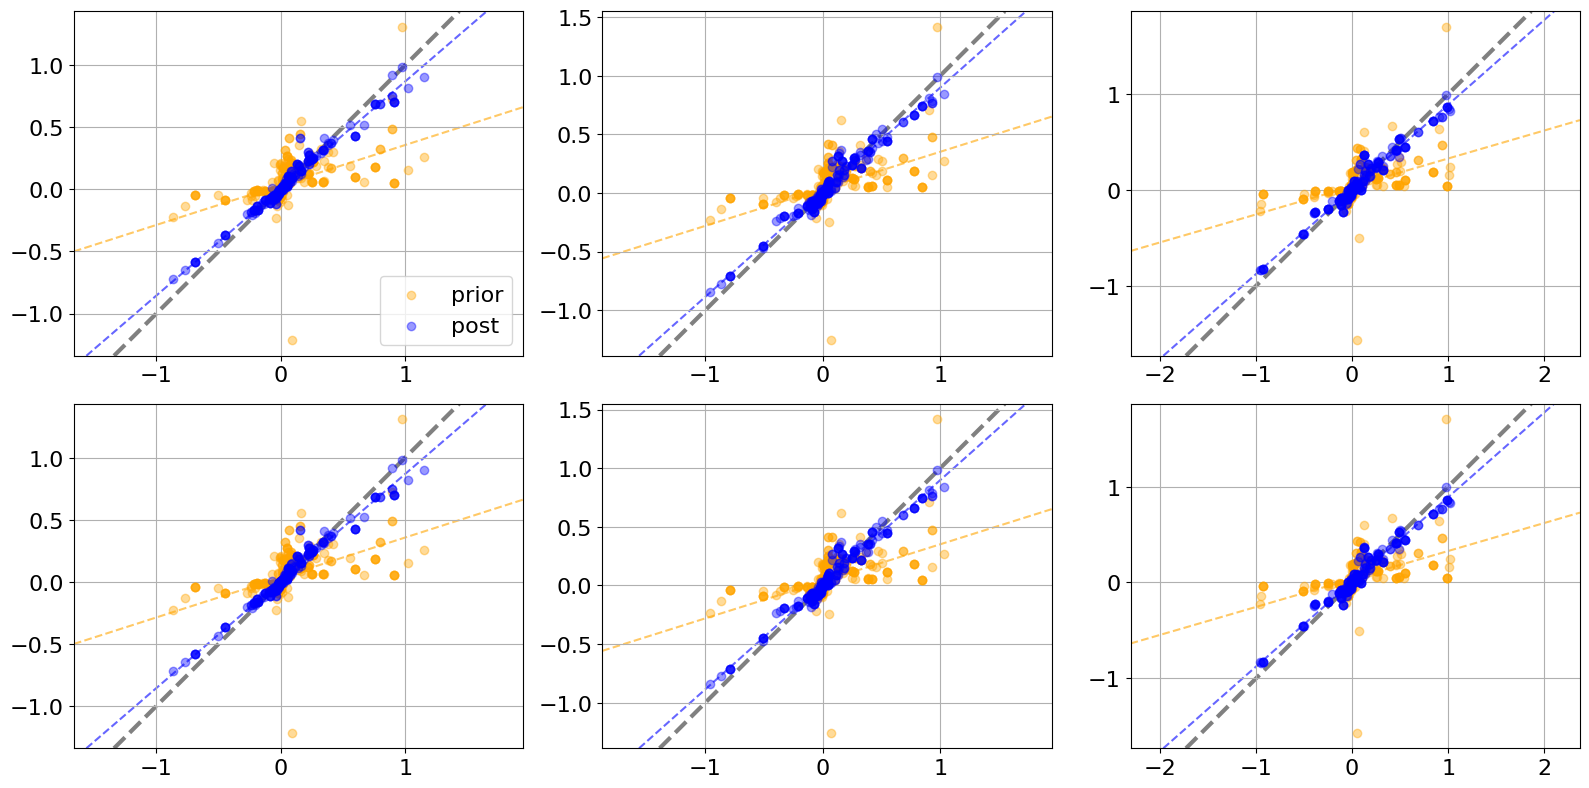

In [68]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(2, 3, figsize=(16,8))

for i in range(2):
    for ii in range(3):
        ax[i,ii].tick_params(axis='both', which='major', labelsize=16)

ax[0,0].set_aspect('equal', 'datalim')
ax[0,0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,0].grid()
ax[0,0].legend(loc="lower right", fontsize=16)

ax[0,1].set_aspect('equal', 'datalim')
ax[0,1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[0,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[0,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,1].grid()

ax[0,2].set_aspect('equal', 'datalim')
ax[0,2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0,2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[0,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[0,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0,2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0,2].grid()

"""priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2"""

ax[1,0].set_aspect('equal', 'datalim')
ax[1,0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[1,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[1,0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,0].grid()

ax[1,1].set_aspect('equal', 'datalim')
ax[1,1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1,1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,1].grid()

ax[1,2].set_aspect('equal', 'datalim')
ax[1,2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1,2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[1,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[1,2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1,2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1,2].grid()
    
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

f.tight_layout()

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}-{omission}-combinedFCCs.svg', format="svg")

In [45]:
priorFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_noReg_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg1_meds.loc[pt_enz_is_rxn, 'median'] += 2

priorFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2
postFCC_reg2_meds.loc[pt_enz_is_rxn, 'median'] += 2

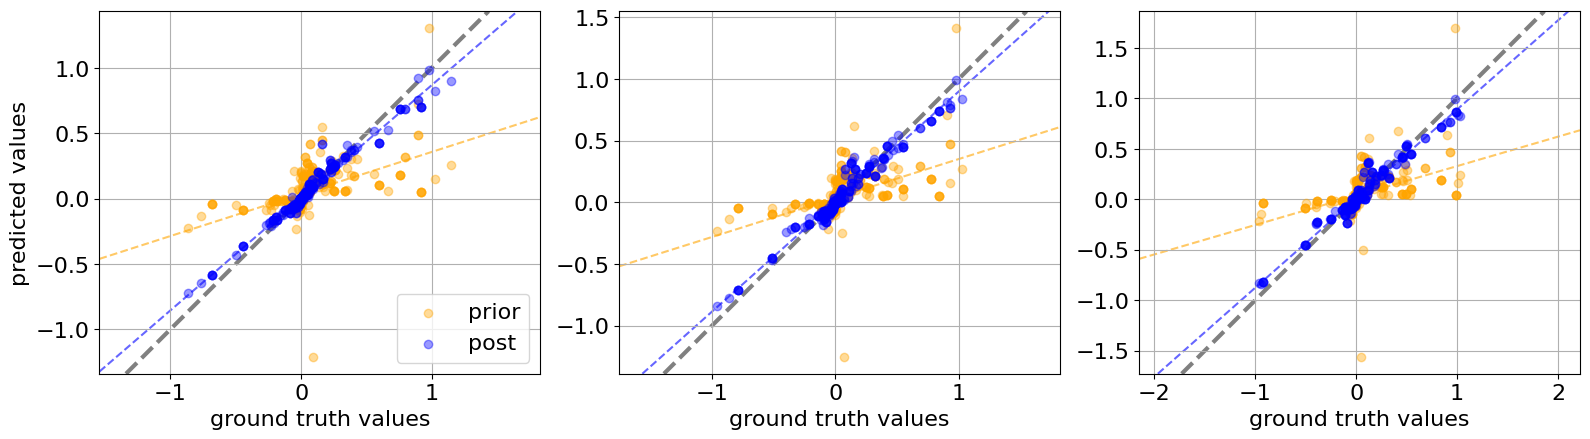

In [69]:
# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(1, 3, figsize=(16,4.5))

for ii in range(3):
    ax[ii].tick_params(axis='both', which='major', labelsize=16)

ax[0].set_aspect('equal', 'datalim')
ax[0].scatter(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[0].scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], priorFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
ax[0].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[0].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[0].grid()
ax[0].legend(loc="lower right", fontsize=16)
ax[0].set_xlabel('ground truth values', fontsize=16)

ax[1].set_aspect('equal', 'datalim')
ax[1].scatter(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[1].scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], priorFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
ax[1].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[1].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[1].grid()
ax[1].set_xlabel('ground truth values', fontsize=16)

ax[2].set_aspect('equal', 'datalim')
ax[2].scatter(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'], alpha=0.4, label='prior', zorder=100, c='orange')
ax[2].scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='post', zorder=100, c='b')
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], priorFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='orange', zorder=0)
slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
ax[2].axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='b', zorder=0)
ax[2].axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
ax[2].grid()

ax[2].set_xlabel('ground truth values', fontsize=16)
ax[0].set_ylabel('predicted values', fontsize=16)

_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)


f.tight_layout()

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs.svg', format="svg")

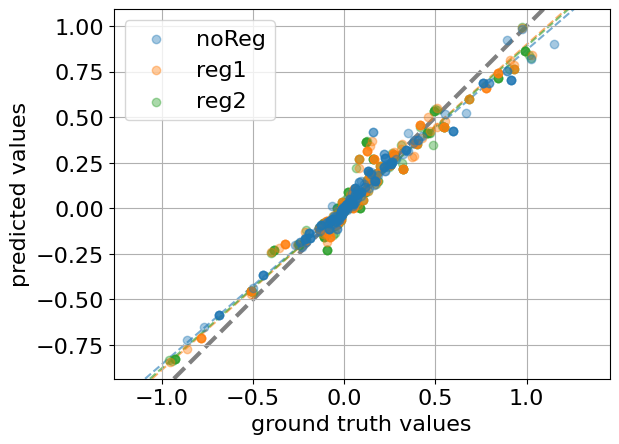

In [70]:
# Create two subplots and unpack the output array immediately

plt.axes().set_aspect('equal', 'datalim')

plt.scatter(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], alpha=0.4, label='noReg', zorder=300)
plt.scatter(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], alpha=0.4,  label='reg1', zorder=200)
plt.scatter(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], alpha=0.4,  label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="upper left", fontsize=16)

plt.xlabel('ground truth values', fontsize=16)
plt.ylabel('predicted values', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

f.tight_layout()

# plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs_byAllostery.svg', format="svg")

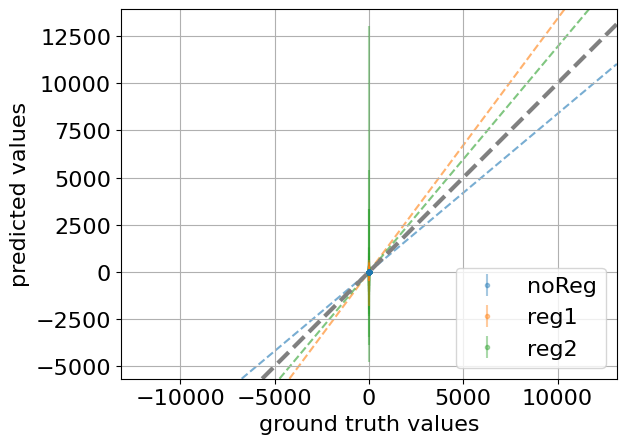

In [84]:
# fruit

plt.axes().set_aspect('equal', 'datalim')

plt.errorbar(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'], yerr=FCC_errors_noReg_post, alpha=0.4, fmt='o', markersize=3, label='noReg', zorder=300)
plt.errorbar(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'], yerr=FCC_errors_reg1_post, alpha=0.4, fmt='o', markersize=3, label='reg1', zorder=200)
plt.errorbar(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'], yerr=FCC_errors_reg2_post, alpha=0.4, fmt='o', markersize=3, label='reg2', zorder=100)

slope, intercept, _ = util.calculate_slope(gtFCC_noReg.melt()['value'], postFCC_noReg_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:blue', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg1.melt()['value'], postFCC_reg1_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:orange', zorder=0)

slope, intercept, _ = util.calculate_slope(gtFCC_reg2.melt()['value'], postFCC_reg2_meds['median'])
plt.axline((0, intercept), slope=slope, linestyle='--', alpha=0.6, color='tab:green', zorder=0)

plt.axline([0, 0], [1, 1], c='gray', linestyle='dashed', zorder=1, linewidth=3)
plt.grid()
plt.legend(loc="lower right", fontsize=16)

plt.xlabel('ground truth values', fontsize=16)
plt.ylabel('predicted values', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#f.tight_layout()

plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-combinedFCCs_byAllostery_wError.svg', format="svg")

### Graphing the absolute error

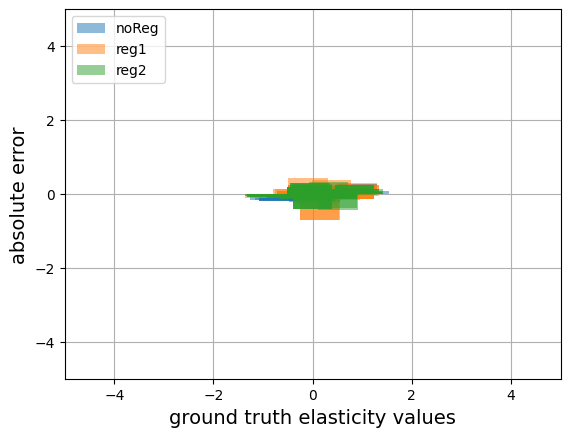

In [39]:
# FCCs need to be corrected before running this cell

plt.grid()
plt.xlim((-5,5))
plt.ylim((-5,5))

plt.bar(gtFCC_noReg.melt()['value'], gtFCC_noReg.melt()['value']-postFCC_noReg_meds['median'], alpha=0.5, label='noReg', zorder=200)
plt.bar(gtFCC_reg1.melt()['value'], gtFCC_reg1.melt()['value']-postFCC_reg1_meds['median'], alpha=0.5, label='reg1', zorder=200)
plt.bar(gtFCC_reg2.melt()['value'], gtFCC_reg2.melt()['value']-postFCC_reg2_meds['median'], alpha=0.5, label='reg2', zorder=200)

plt.xlabel('ground truth elasticity values', size=14)
plt.ylabel('absolute error', size=14)

plt.legend(loc="upper left")
plt.savefig(f'../data/results/raw_svg_figures/top{topology}/top{topology}-{omission}-absError_byAllostery.svg', format="svg")

### Comparing elasticity values with FCC values. 


In [28]:
ela_noReg_df

,0.1x,0.2x,0.3x,0.4x,0.5x,1.5x,3x,5x,7x,10x,median,min,max
0,0.012,0.006,0.010,0.003,-0.005,-0.003,0.009,-0.008,0.005,0.004,0.0045,-0.008,0.012
1,-0.338,-0.306,-0.239,-0.232,-0.208,-0.336,-0.403,-0.436,-0.437,-0.442,-0.3370,-0.442,-0.208
2,-0.015,0.005,0.008,0.000,0.004,0.001,-0.002,0.006,0.009,-0.004,0.0025,-0.015,0.009
3,0.006,-0.004,0.010,-0.003,0.007,0.004,0.008,-0.001,0.004,0.005,0.0045,-0.004,0.010
4,0.008,0.010,0.006,-0.003,0.006,-0.001,0.003,0.000,0.006,0.000,0.0045,-0.003,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-0.004,-0.005,-0.001,0.000,0.006,0.000,0.000,0.006,0.009,0.004,0.0000,-0.005,0.009
243,-0.006,-0.005,-0.005,-0.001,-0.006,0.002,0.002,0.008,-0.005,0.005,-0.0030,-0.006,0.008
244,-0.020,-0.011,-0.011,-0.004,-0.007,-0.009,-0.013,-0.017,-0.040,-0.095,-0.0120,-0.095,-0.004
245,0.004,-0.003,0.006,-0.003,-0.007,0.002,-0.004,0.013,0.000,0.001,0.0005,-0.007,0.013


In [30]:
postFCC_noReg_meds

,0.1x,0.2x,0.3x,0.4x,0.5x,1.5x,3x,5x,7x,10x,median,min,max
0,-1.452365,-1.504568,-1.459433,-1.539324,-1.528220,-1.699724,-1.704990,-1.719983,-1.704306,-1.718776,-1.619524,-1.719983,-1.452365
1,0.980925,0.703016,0.692264,0.446629,0.411264,0.143485,0.201340,0.208049,0.225773,0.244899,0.328082,0.143485,0.980925
2,0.980925,0.703016,0.692264,0.446629,0.411264,0.143485,0.201340,0.208049,0.225773,0.244899,0.328082,0.143485,0.980925
3,0.419860,0.434212,0.495829,0.464819,0.489628,0.346517,0.322635,0.301242,0.316315,0.291937,0.383188,0.291937,0.495829
4,0.419860,0.434212,0.495829,0.464819,0.489628,0.346517,0.322635,0.301242,0.316315,0.291937,0.383188,0.291937,0.495829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
357,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
358,-0.012204,-0.006490,-0.002531,-0.002283,-0.002511,-0.001045,-0.002450,-0.003086,-0.005191,-0.006964,-0.002808,-0.012204,-0.001045
359,0.210061,0.238124,0.248757,0.253647,0.260030,0.274622,0.250842,0.246343,0.243389,0.241421,0.247550,0.210061,0.274622


## How does the presence of regulators affect BMCA’s performance?

## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


In [87]:
rank_counts_df = pd.read_csv('../data/results/TopologyB_top10.csv')

In [88]:
rank_counts_df

,Perturbation,omittedData,regulation,count,type
0,0.1x,allData,noReg,6,prior
1,0.2x,allData,noReg,6,prior
2,0.3x,allData,noReg,6,prior
3,0.4x,allData,noReg,6,prior
4,0.5x,allData,noReg,6,prior
...,...,...,...,...,...
295,1.5x,omitExMet,reg2,8,post
296,3x,omitExMet,reg2,8,post
297,5x,omitExMet,reg2,9,post
298,7x,omitExMet,reg2,8,post


In [89]:
stagbar_counts = rank_counts_df.pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])
stagbar_counts

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1542227218.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1542227218.py:1: FutureWarning:

The operation <function std at 0x000002A3FF1AC280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.



,omittedData,type,mean,std
,,,count,count
1,allData,prior,6.100000,0.305129
0,allData,post,7.533333,0.937102
7,omitFluxes,prior,6.333333,0.479463
6,omitFluxes,post,6.100000,0.758856
3,omitEnzymes,prior,6.000000,0.262613
2,omitEnzymes,post,7.333333,0.711159
9,omitIntMet,prior,6.033333,0.182574
8,omitIntMet,post,6.233333,1.194335
5,omitExMet,prior,6.033333,0.182574


C:\Users\user\AppData\Local\Temp\ipykernel_17632\229864368.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



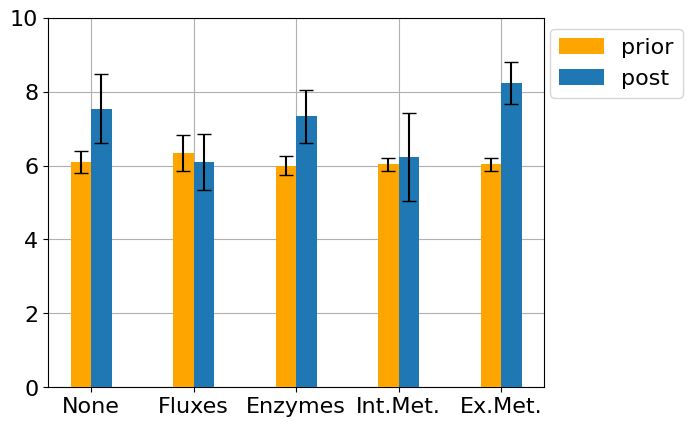

In [92]:
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int.Met.', 'Ex.Met.'])
_ = ax.set_yticks(range(0,12,2))

ax.legend(fontsize=16, bbox_to_anchor=(0.99, 1))
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)

plt.savefig(f'../data/results/raw_svg_figures/top{topology}_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1103494039.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1103494039.py:1: FutureWarning:

The operation <function std at 0x000002A3FF1AC280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\1103494039.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



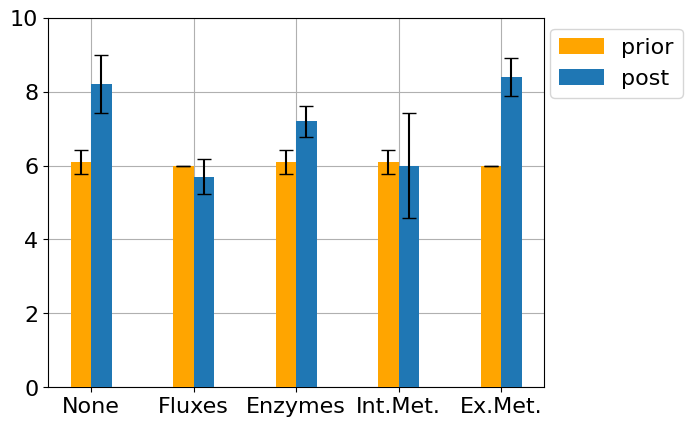

In [93]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='noReg'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int.Met.', 'Ex.Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend(fontsize=16, bbox_to_anchor=(0.99, 1))
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-noReg_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_17632\680474560.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\680474560.py:1: FutureWarning:

The operation <function std at 0x000002A3FF1AC280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\680474560.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



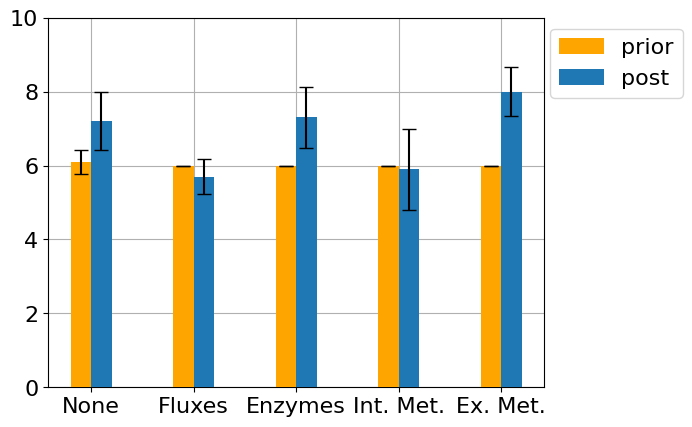

In [94]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg1'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend(fontsize=16, bbox_to_anchor=(0.99, 1))
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg1_rankCounts.svg', format='svg')

C:\Users\user\AppData\Local\Temp\ipykernel_17632\3545400627.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\3545400627.py:1: FutureWarning:

The operation <function std at 0x000002A3FF1AC280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.

C:\Users\user\AppData\Local\Temp\ipykernel_17632\3545400627.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



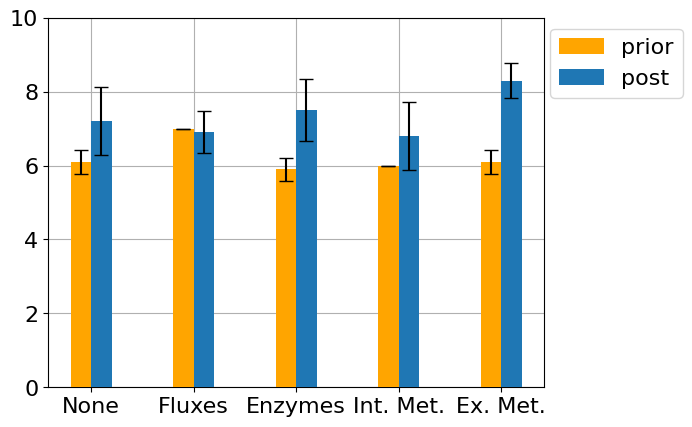

In [95]:
stagbar_counts = rank_counts_df[rank_counts_df['regulation']=='reg2'].pivot_table(index=['omittedData','type'], aggfunc=['mean',np.std])
stagbar_counts.reset_index(inplace=True)
stagbar_counts = stagbar_counts.reindex([1,0,7,6,3,2,9,8,5,4])

ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values,
        width=0.2, color='orange', align='center', zorder=100, label='prior')
plt.errorbar([i-0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='prior']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='prior']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

ax.bar([i+0.1 for i in range(5)], stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values,
        width=0.2, color='tab:blue', align='center', zorder=100, label='post')
plt.errorbar([i+0.1 for i in range(5)], 
             stagbar_counts[stagbar_counts['type']=='post']['mean']['count'].values, 
             yerr=stagbar_counts[stagbar_counts['type']=='post']['std']['count'].values, 
             ls='none', color='black', capsize=5, zorder=1000)

_ = ax.set_xticklabels([0, 'None', 'Fluxes', 'Enzymes', 'Int. Met.', 'Ex. Met.'])
_ = ax.set_yticks(range(0,12,2))
ax.legend(fontsize=16, bbox_to_anchor=(0.99, 1))
_=plt.xticks(fontsize=16)
_=plt.yticks(fontsize=16)
plt.savefig(f'../data/results/raw_svg_figures/top{topology}-reg2_rankCounts.svg', format='svg')

## Visualizing Spearman data 

### Condense Spearman data

In [96]:
os.chdir(f'../data/results/spearman_coefficients/topology{topology}/')

In [97]:
spr_file_list = [i for i in os.listdir()]

spr_dfs = []
for file in spr_file_list:
    a = pd.read_csv(file)

    reg = file.split('-')[1].split('_')[0]
    omit = file.split('_')[1]

    a['reg'] = [reg]*len(a)
    a['omit'] = [omit]*len(a)
    spr_dfs.append(a)

all_spr_df_B = pd.concat(spr_dfs)
all_spr_df_B

,Unnamed: 0,r,p-value,lower,upper,reg,omit
0,0.1x-prior,0.318885,0.197128,-0.192491,0.750293,noReg,allData
1,0.2x-prior,0.285862,0.250170,-0.256156,0.726530,noReg,allData
2,0.3x-prior,0.234262,0.349454,-0.367276,0.681976,noReg,allData
3,0.4x-prior,0.250774,0.315513,-0.319241,0.699851,noReg,allData
4,0.5x-prior,0.170279,0.499341,-0.375305,0.633770,noReg,allData
...,...,...,...,...,...,...,...
15,1.5x-post,0.591331,0.009747,0.077044,0.853485,reg2,omitIntMet
16,3x-post,0.413829,0.087785,-0.078306,0.745657,reg2,omitIntMet
17,5x-post,0.659443,0.002909,0.276142,0.841506,reg2,omitIntMet
18,7x-post,0.310630,0.209625,-0.202747,0.699687,reg2,omitIntMet


In [98]:
os.chdir('../../../../notebooks/')

In [99]:
all_spr_df_B.rename(columns={'Unnamed: 0':'perturbation'}, inplace=True)
all_spr_df_B['distr'] = [(i.split('-')[1]) for i in all_spr_df_B['perturbation']]
all_spr_df_B['perturbation'] = [float(i.split('x')[0]) for i in all_spr_df_B['perturbation']]

In [100]:
all_spr_df_B = all_spr_df_B[all_spr_df_B['perturbation'] != 1.01]
all_spr_df_B

,perturbation,r,p-value,lower,upper,reg,omit,distr
0,0.1,0.318885,0.197128,-0.192491,0.750293,noReg,allData,prior
1,0.2,0.285862,0.250170,-0.256156,0.726530,noReg,allData,prior
2,0.3,0.234262,0.349454,-0.367276,0.681976,noReg,allData,prior
3,0.4,0.250774,0.315513,-0.319241,0.699851,noReg,allData,prior
4,0.5,0.170279,0.499341,-0.375305,0.633770,noReg,allData,prior
...,...,...,...,...,...,...,...,...
15,1.5,0.591331,0.009747,0.077044,0.853485,reg2,omitIntMet,post
16,3.0,0.413829,0.087785,-0.078306,0.745657,reg2,omitIntMet,post
17,5.0,0.659443,0.002909,0.276142,0.841506,reg2,omitIntMet,post
18,7.0,0.310630,0.209625,-0.202747,0.699687,reg2,omitIntMet,post


In [101]:
a = pd.pivot_table(all_spr_df_B, values=['r'], index=['omit', 'distr'], aggfunc=['mean', 'std'], sort=False)
a.reset_index(inplace=True)
a = a.reindex([0,1,6,7,2,3,8,9,4,5])
a

,omit,distr,mean,std
,,,r,r
0,allData,prior,0.237633,0.085741
1,allData,post,0.594840,0.218064
6,omitFluxes,prior,0.162986,0.057776
7,omitFluxes,post,0.273959,0.045960
2,omitEnzymes,prior,0.214792,0.062460
3,omitEnzymes,post,0.525077,0.160080
8,omitIntMet,prior,0.219264,0.051822
9,omitIntMet,post,0.307878,0.268801
4,omitExMet,prior,0.219264,0.057713


### Graph of aggregated Spearman corr

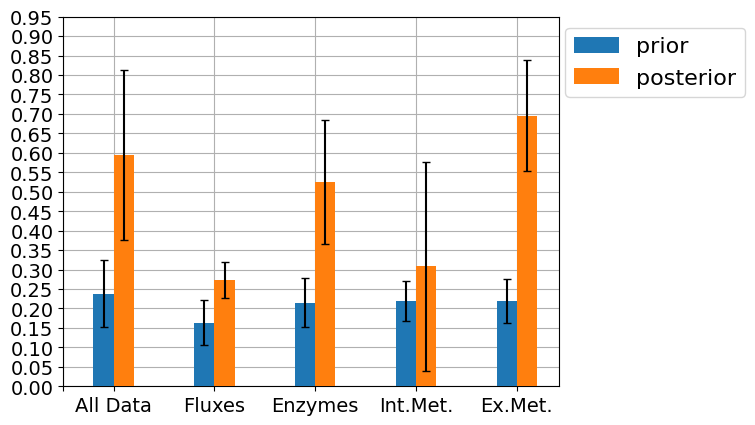

In [103]:
# plot
ax = plt.subplot(111)
ax.grid()

ax.bar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), width=0.2, color='tab:blue', align='center', zorder=100, label='prior')
ax.bar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), width=0.2, color='tab:orange', align='center', zorder=100, label='posterior')

## add error bars
plt.errorbar([i-0.1 for i in range(5)], a[a['distr']=='prior']['mean'].squeeze(), 
             yerr=a[a['distr']=='prior']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

plt.errorbar([i+0.1 for i in range(5)], a[a['distr']=='post']['mean'].squeeze(), 
             yerr=a[a['distr']=='post']['std'].squeeze(), 
             color='black', capsize=3, zorder=1000, ls='none')

ax.set_xticks([-0.5]+list(np.arange(0,5)))
_ = ax.set_xticklabels(['', 'All Data', "Fluxes", 'Enzymes', "Int.Met.", "Ex.Met."], size=14) ## fix the labels
_ = ax.set_yticks(np.arange(0,1,0.05))

ax.legend()#plt.ylabel('Spearman correlation coefficient ($r$)', size=14)
ax.legend(fontsize=16, bbox_to_anchor=(0.99, 1))
_=plt.xticks(fontsize=14)
_=plt.yticks(fontsize=14)
plt.savefig(f'../data/results/raw_svg_figures/Top{topology}_sprCorr.svg', format='svg' )